# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (16)

**18/12/2023**

## Clasificación con Redes Neuronales (Neural Network Clasification) 

Las redes neuronales artificiales están basadas en el funcionamiento de las redes de neuronas biológicas. Podemos aplicar estas estructuras para crear **un modelo de clasificación basado en el funcionamiento de las redes neuronales artificiales**.

### Procesado de información de una neurona artificial
Aquí se representa **el procesado de los datos al atravesar una neurona** dentro de la estructura de una red neuronal artificial:

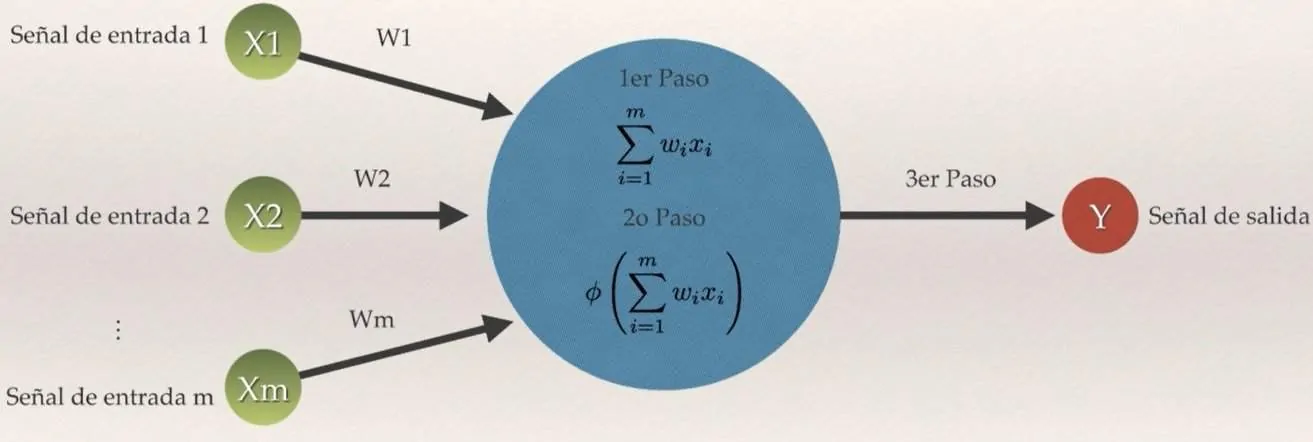

### Valores de salida y pesos de las redes neuronales

Las respuestas calculadas por las redes o los valores de salida pueden ser:
* **continuos**, como el precio de una compra determinada o una vivienda! 
* **categóricos**, como el producto que más se venderá el próximo año o la especie de una flor!
* **binarios**, como por ejemplo si una persona padece de una enfermedad o no. (_el caso binario es un caso particular donde tenemos **dos categorías**_).

Para poder llevar a cabo el procesado, cada conexión entre las neuronas llamada ***sinapsis*** tendrá asignada un valor o un **peso** que equivale a la **fuerza de la señal** que se trasmite a otras. El ajuste de estos pesos para tener una red neuronal que haga lo que queremos es fundamental. 

Existen **distintos métodos para ajustar estos pesos**, como **el descenso de gradiente (Gradient Descent)** y **el Backpropagation**. 

### Ejemplo de la calidad del aire

En los últimos años, los **altos niveles de contaminación** durante ciertos periodos secos en **Madrid** ha obligado a las autoridades a tomar medidas contra el uso de automóviles en el centro de la ciudad, y ha sido utilizado como razón para **proponer modificaciones drásticas en el urbanismo de la ciudad**. 

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de calidad del aire están públicamente disponibles e incluyen **datos históricos diarios y horarios de los niveles registrados desde 2001 hasta 2018** y la lista de estaciones que se utilizan para el análisis de contaminación.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran la **calidad del aire** en varias estaciones de **Madrid** según diferentes variables.

In [2]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos preparados y preprocesados para el modelo

In [4]:
# Cargar el dataset desde un archivo

df_aire_calidad = pd.read_csv('Calidad_aire_procesado.csv')

In [5]:
# Consultar los registros del DataFrame
df_aire_calidad

ALTITUD  Distancia_Pto_trafico1  Intensidad_Pto_trafico1  \
0          635               60.589582                   154.00   
1          635               60.589582                   159.00   
2          635               60.589582                   111.00   
3          635               60.589582                    70.00   
4          635               60.589582                    66.00   
...        ...                     ...                      ...   
49249      599              323.225854                   521.75   
49250      599              323.225854                   497.00   
49251      599              323.225854                   559.75   
49252      599              323.225854                   518.50   
49253      599              323.225854                   472.25   

       Intensidad_Pto_trafico2  Intensidad_Pto_trafico3  \
0                       697.00                   259.00   
1                       753.00                   282.00   
2                       851.00                   235.00   
3                       557.00                   150.00   
4                       532.00                   167.00   
...                        ...                      ...   
49249                   882.50                  1427.00   
49250                  1001.75                  1413.75   
49251                  1085.75                  1487.50   
49252                  1024.75                  1535.75   
49253                   919.75                  1276.75   

       Intensidad_Pto_trafico4  Intensidad_Pto_trafico5  Carga_Pto_trafico4  \
0                       847.00                   845.00               46.00   
1                       854.00                   929.00               48.00   
2                       678.00                  1056.00               41.00   
3                       511.00                   719.00               33.00   
4                       439.00                   632.00               25.00   
...                        ...                      ...                 ...   
49249                   113.75                  1166.50               14.25   
49250                   135.00                  1144.25               18.25   
49251                   138.25                  1206.25               20.00   
49252                   139.00                  1224.25               19.25   
49253                   122.75                  1048.75               16.50   

       Carga_Pto_trafico3  Intensidad_mediaR1_500  ...  feelslike_c  \
0                    6.00              493.727273  ...         21.0   
1                    8.00              500.659091  ...         20.6   
2                    5.00              458.159091  ...         20.1   
3                    4.00              338.454545  ...         19.7   
4                    5.00              282.681818  ...         19.5   
...                   ...                     ...  ...          ...   
49249               45.50              601.100000  ...         11.0   
49250               45.75              641.575000  ...          9.4   
49251               48.25              699.375000  ...          7.7   
49252               49.75              673.100000  ...          6.6   
49253               42.00              582.825000  ...          5.4   

       windchill_c  heatindex_c  dewpoint_c  mes  dia  hora  diasemana  \
0             21.0         21.0        10.9   10    1     0          1   
1             20.6         20.6        11.1   10    1     1          1   
2             20.1         20.1        11.2   10    1     2          1   
3             19.7         19.7        11.4   10    1     3          1   
4             19.5         19.5        11.2   10    1     4          1   
...            ...          ...         ...  ...  ...   ...        ...   
49249         11.0         12.1        -7.0    2   22    16          5   
49250          9.4         11.0        -6.6    2   22    17          5   
49251          7.7       

In [6]:
# La información útil sobre los datos guardados en formato DataFrame
df_aire_calidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49254 entries, 0 to 49253
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ALTITUD                      49254 non-null  int64  
 1   Distancia_Pto_trafico1       49254 non-null  float64
 2   Intensidad_Pto_trafico1      49254 non-null  float64
 3   Intensidad_Pto_trafico2      49254 non-null  float64
 4   Intensidad_Pto_trafico3      49254 non-null  float64
 5   Intensidad_Pto_trafico4      49254 non-null  float64
 6   Intensidad_Pto_trafico5      49254 non-null  float64
 7   Carga_Pto_trafico4           49254 non-null  float64
 8   Carga_Pto_trafico3           49254 non-null  float64
 9   Intensidad_mediaR1_500       49254 non-null  float64
 10  Intensidad_mediaR3_750_1000  49254 non-null  float64
 11  Intensidad_mediaR6_2000      49254 non-null  float64
 12  Intensidad_minR1_500         49254 non-null  float64
 13  Intensidad_minR2_500_

### Planteamiento del ejercicio de clasificación

Se ha creado una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25 o el primer cuartil (Q1)** de la variable objetivo original (`Calidad_NO2`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25 o el primer cuartil (Q1)**.  

Procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad del aire de las distintas zonas está en el nivel 0, 1.**


In [7]:
df_aire_calidad.describe()

ALTITUD  Distancia_Pto_trafico1  Intensidad_Pto_trafico1  \
count  49254.000000            49254.000000             49254.000000   
mean     661.735027              140.003163               348.427424   
std       34.497321               98.958425               385.365535   
min      599.000000               48.351595                 0.000000   
25%      635.000000               71.219285                61.500000   
50%      670.000000               86.018742               208.750000   
75%      693.000000              168.527832               476.750000   
max      708.000000              407.571507              2844.250000   

       Intensidad_Pto_trafico2  Intensidad_Pto_trafico3  \
count             49254.000000             49254.000000   
mean                307.270861               465.780060   
std                 311.674022               781.171063   
min                   0.000000                 0.000000   
25%                  71.000000                89.250000   
50%                 193.000000               269.000000   
75%                 446.500000               669.750000   
max                1950.000000             30660.000000   

       Intensidad_Pto_trafico4  Intensidad_Pto_trafico5  Carga_Pto_trafico4  \
count             49254.000000             49254.000000        49254.000000   
mean                396.266552               415.983267           24.459218   
std                 363.917301               395.422520           18.969057   
min                   0.000000                 0.000000            0.000000   
25%                  84.000000                72.750000            8.000000   
50%                 276.875000               309.000000           20.000000   
75%                 649.000000               647.000000           38.250000   
max                3121.750000              2307.000000          100.000000   

       Carga_Pto_trafico3  Intensidad_mediaR1_500  ...   feelslike_c  \
count        49254.000000            49254.000000  ...  49254.000000   
mean            19.582406              388.981257  ...     10.142878   
std             17.162813              304.860574  ...      7.045263   
min              0.000000                2.500000  ...     -2.600000   
25%              6.000000              146.391667  ...      4.800000   
50%             14.250000              326.584350  ...      8.700000   
75%             29.000000              560.473438  ...     14.500000   
max            100.000000             2632.795833  ...     31.400000   

        windchill_c   heatindex_c    dewpoint_c           mes           dia  \
count  49254.000000  49254.000000  49254.000000  49254.000000  49254.000000   
mean      10.158558     11.595022      2.455007      5.857250     15.798656   
std        7.096225      6.109079      4.533624      4.334602      8.726627   
min       -2.600000      0.300000    -11.700000      1.000000      1.000000   
25%        4.800000      7.100000     -0.800000      2.000000      8.000000   
50%        8.700000     10.300000      2.400000      4.000000     16.000000   
75%       14.500000     14.700000      5.800000     11.000000     23.000000   
max       33.500000     31.400000     16.500000     12.000000     31.000000   

               hora     diasemana  Dir_viento_etiquetado     Escenario  
count  49254.000000  49254.000000           49254.000000  49254.000000  
mean      11.479433      3.972429               1.639258      0.759857  
std        6.935243      2.008118               1.022857      0.427174  
min        0.000000      1.000000               0.000000      0.000000  
25%        5.000000      2.000000               1.000000      1.000000  
50%       11.000000      4.000000               2.000000      1.000000  
75%       17.000000      6.000000               2.000000      1.000000  
max       23.000000      7.000000               3.000000      1.000000  

[8 rows x 47 columns]

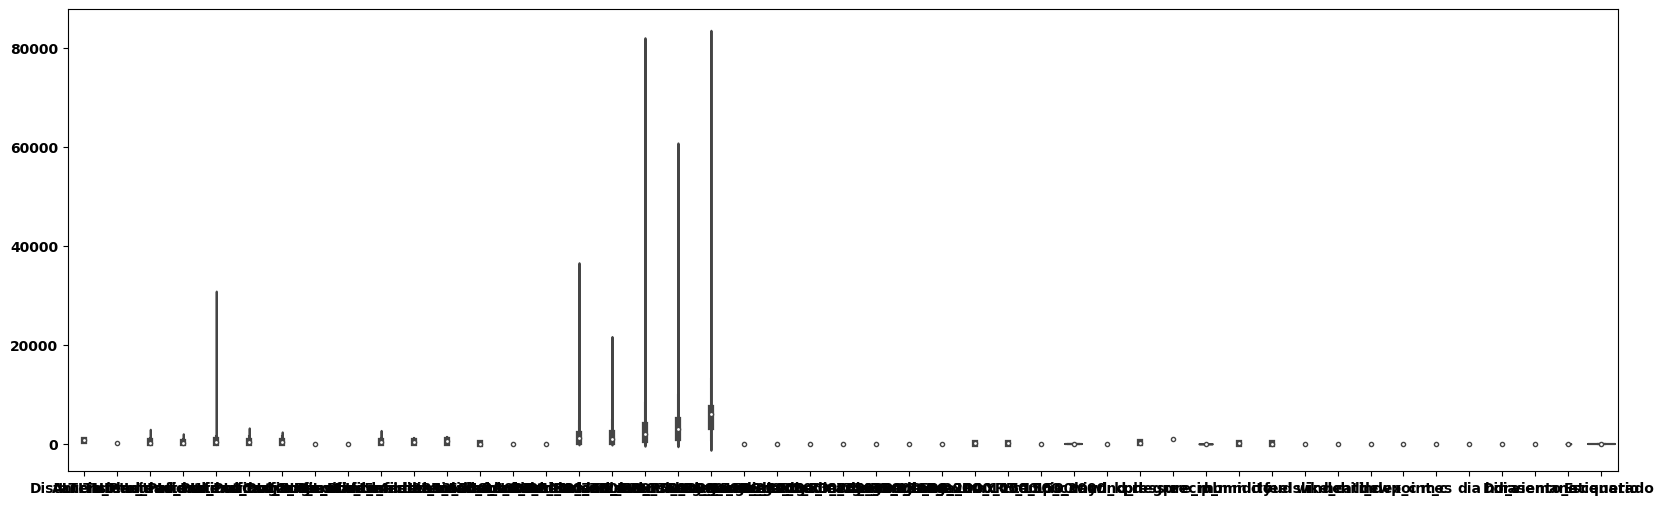

In [8]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_aire_calidad, orient='v')
plt.show()

In [9]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [10]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [11]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


ALTITUD  Distancia_Pto_trafico1  Intensidad_Pto_trafico1  \
0      0.330275                0.034068                 0.054144   
1      0.330275                0.034068                 0.055902   
2      0.330275                0.034068                 0.039026   
3      0.330275                0.034068                 0.024611   
4      0.330275                0.034068                 0.023205   
...         ...                     ...                      ...   
49249  0.000000                0.765198                 0.183440   
49250  0.000000                0.765198                 0.174739   
49251  0.000000                0.765198                 0.196801   
49252  0.000000                0.765198                 0.182298   
49253  0.000000                0.765198                 0.166037   

       Intensidad_Pto_trafico2  Intensidad_Pto_trafico3  \
0                     0.357436                 0.008447   
1                     0.386154                 0.009198   
2                     0.436410                 0.007665   
3                     0.285641                 0.004892   
4                     0.272821                 0.005447   
...                        ...                      ...   
49249                 0.452564                 0.046543   
49250                 0.513718                 0.046111   
49251                 0.556795                 0.048516   
49252                 0.525513                 0.050090   
49253                 0.471667                 0.041642   

       Intensidad_Pto_trafico4  Intensidad_Pto_trafico5  Carga_Pto_trafico4  \
0                     0.271322                 0.366277              0.4600   
1                     0.273565                 0.402687              0.4800   
2                     0.217186                 0.457737              0.4100   
3                     0.163690                 0.311660              0.3300   
4                     0.140626                 0.273949              0.2500   
...                        ...                      ...                 ...   
49249                 0.036438                 0.505635              0.1425   
49250                 0.043245                 0.495990              0.1825   
49251                 0.044286                 0.522865              0.2000   
49252                 0.044526                 0.530668              0.1925   
49253                 0.039321                 0.454595              0.1650   

       Carga_Pto_trafico3  Intensidad_mediaR1_500  ...  cloud  feelslike_c  \
0                  0.0600                0.186757  ...   0.00     0.694118   
1                  0.0800                0.189393  ...   0.00     0.682353   
2                  0.0500                0.173235  ...   0.00     0.667647   
3                  0.0400                0.127725  ...   0.00     0.655882   
4                  0.0500                0.106521  ...   0.11     0.650000   
...                   ...                     ...  ...    ...          ...   
49249              0.4550                0.227579  ...   0.05     0.400000   
49250              0.4575                0.242967  ...   0.05     0.352941   
49251              0.4825                0.264942  ...   0.05     0.302941   
49252              0.4975                0.254952  ...   0.05     0.270588   
49253              0.4200                0.220631  ...   0.05     0.235294   

       windchill_c  heatindex_c  dewpoint_c       mes  dia      hora  \
0         0.653740     0.665595    0.801418  0.818182  0.0  0.000000   
1         0.642659     0.652733    0.808511  0.818182  0.0  0.043478   
2         0.628809     0.636656    0.812057  0.818182  0.0  0.086957   
3         0.617729     0.623794    0.819149  0.818182  0.0  0.130435   
4         0.612188     0.617363    0.812057  0.818182  0.0  0.173913   
...            ...          ...         ...       ...  ...       ...   
49249     0.376731     0.379421    0.166667  0.090909  0.7  0.695652   
49250     0.332410  

In [12]:
X_normal.describe().round(4)

ALTITUD  Distancia_Pto_trafico1  Intensidad_Pto_trafico1  \
count  49254.0000              49254.0000               49254.0000   
mean       0.5756                  0.2551                   0.1225   
std        0.3165                  0.2755                   0.1355   
min        0.0000                  0.0000                   0.0000   
25%        0.3303                  0.0637                   0.0216   
50%        0.6514                  0.1049                   0.0734   
75%        0.8624                  0.3345                   0.1676   
max        1.0000                  1.0000                   1.0000   

       Intensidad_Pto_trafico2  Intensidad_Pto_trafico3  \
count               49254.0000               49254.0000   
mean                    0.1576                   0.0152   
std                     0.1598                   0.0255   
min                     0.0000                   0.0000   
25%                     0.0364                   0.0029   
50%                     0.0990                   0.0088   
75%                     0.2290                   0.0218   
max                     1.0000                   1.0000   

       Intensidad_Pto_trafico4  Intensidad_Pto_trafico5  Carga_Pto_trafico4  \
count               49254.0000               49254.0000          49254.0000   
mean                    0.1269                   0.1803              0.2446   
std                     0.1166                   0.1714              0.1897   
min                     0.0000                   0.0000              0.0000   
25%                     0.0269                   0.0315              0.0800   
50%                     0.0887                   0.1339              0.2000   
75%                     0.2079                   0.2805              0.3825   
max                     1.0000                   1.0000              1.0000   

       Carga_Pto_trafico3  Intensidad_mediaR1_500  ...       cloud  \
count          49254.0000              49254.0000  ...  49254.0000   
mean               0.1958                  0.1469  ...      0.3238   
std                0.1716                  0.1159  ...      0.3392   
min                0.0000                  0.0000  ...      0.0000   
25%                0.0600                  0.0547  ...      0.0300   
50%                0.1425                  0.1232  ...      0.1800   
75%                0.2900                  0.2121  ...      0.6100   
max                1.0000                  1.0000  ...      1.0000   

       feelslike_c  windchill_c  heatindex_c  dewpoint_c         mes  \
count   49254.0000   49254.0000   49254.0000  49254.0000  49254.0000   
mean        0.3748       0.3534       0.3632      0.5020      0.4416   
std         0.2072       0.1966       0.1964      0.1608      0.3941   
min         0.0000       0.0000       0.0000      0.0000      0.0000   
25%         0.2176       0.2050       0.2186      0.3865      0.0909   
50%         0.3324       0.3130       0.3215      0.5000      0.2727   
75%         0.5029       0.4737       0.4630      0.6206      0.9091   
max         1.0000       1.0000       1.0000      1.0000      1.0000   

              dia        hora   diasemana  Dir_viento_etiquetado  
count  49254.0000  49254.0000  49254.0000             49254.0000  
mean       0.4933      0.4991      0.4954                 0.5464  
std        0.2909      0.3015      0.3347                 0.3410  
min        0.0000      0.0000      0.0000                 0.0000  
25%        0.2333      0.2174      0.1667                 0.3333  
50%        0.5000      0.4783      0.5000                 0.6667  
75%        0.7333      0.7391      0.8333                 0.6667  
max        1.0000      1.0000      1.0000                 1.0000  

[8 rows x 46 columns]

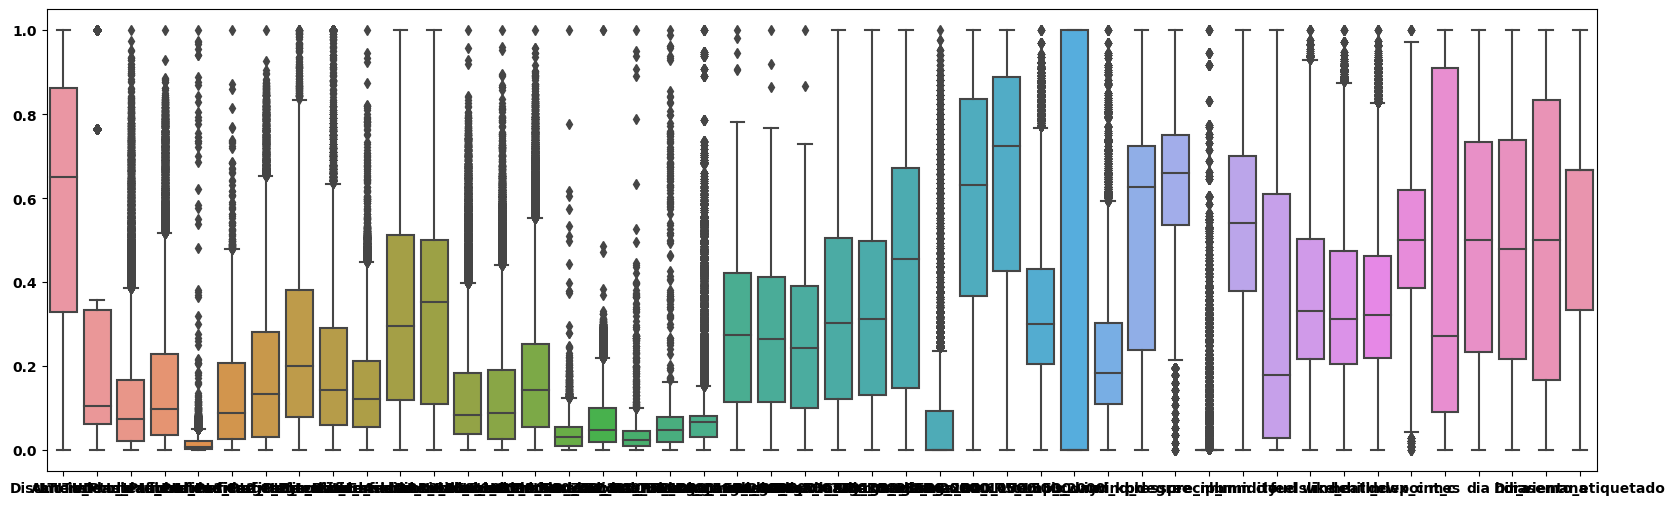

In [13]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test set

In [14]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [15]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

39403
9851


49254

#### **Paso 3.** Cargar y elegir el clasificador __Neural Netwok Classifier (*MLPClassifier*)__

In [16]:
# Importar el módulo que corresponde al algoritmo
from sklearn.neural_network import MLPClassifier

# Asignar el algoritmo que vamos a aplicar
clas_mlp = MLPClassifier(random_state=100)

### **Paso 4.** Entrenar el modelo de clasificación basado en las redes neuronales con los datos de entrenamiento

In [17]:
# Entrenar el modelo
clas_mlp.fit(X_train, y_train)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=100)

Ahora que el modelo está entrenado, sacamos las **predicciones**, analizamos los **resultados** y obtenemos algunas **métricas** del modelo basadas en el conjunto de datos de prueba. Según las métricas, podremos observar si el modelo clasificó correctamente todos los escenarios o no.

### **Paso 5.** Obtener las predicciones 

In [18]:
# Calcular las predicciones con el conjunto de prueba
y_pred = clas_mlp.predict(X_test)

In [19]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[1 1 1 ... 1 1 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9023449396000406

Existen otra serie de metricas para calificar los modelos de clasificación que se detallan a continuación. Algunas de estas medidas se resumen en un informe llamado **classification_report**.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2404
           1       0.92      0.95      0.94      7447

    accuracy                           0.90      9851
   macro avg       0.88      0.85      0.86      9851
weighted avg       0.90      0.90      0.90      9851



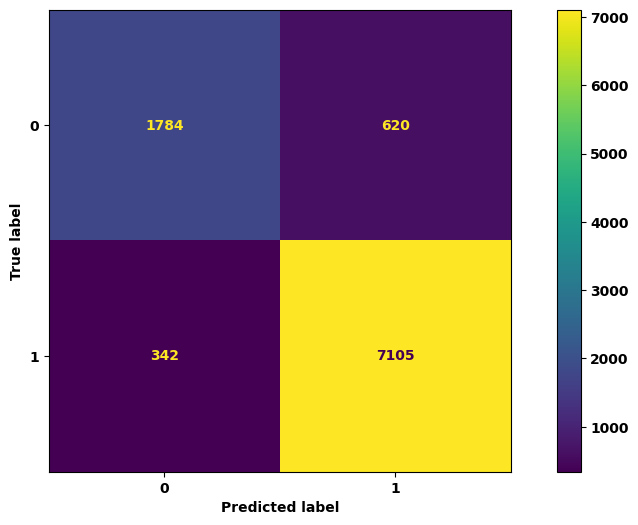

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=clas_mlp.classes_)
disp.plot()

plt.show()

In [23]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8480859862272427

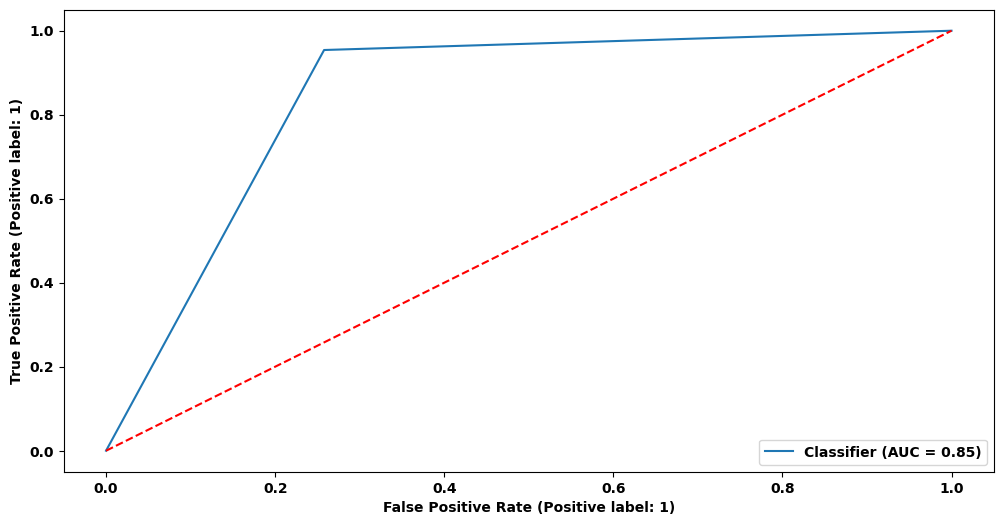

In [24]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.show()

Vamos a obtener más información acerca del modelo:

In [25]:
# Parámetros indicados en la definicón del modelo

clas_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 100,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
# Sacar diferentes parámetros del modelo que se ha entrenado
clas_mlp.__getstate__()

{'activation': 'relu',
 'solver': 'adam',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 200,
 'loss': 'log_loss',
 'hidden_layer_sizes': (100,),
 'shuffle': True,
 'random_state': 100,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 'feature_names_in_': array(['ALTITUD', 'Distancia_Pto_trafico1', 'Intensidad_Pto_trafico1',
        'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3',
        'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5',
        'Carga_Pto_trafico4', 'Carga_Pto_trafico3',
        'Intensidad_mediaR1_500', 'Intensidad_mediaR3_750_1000',
        'Intensidad_mediaR6_2000', 'Intensidad_minR1_500',
        'Intensidad_minR2_500_750', 'Intensidad_minR3_750_1000',
        'Intensi

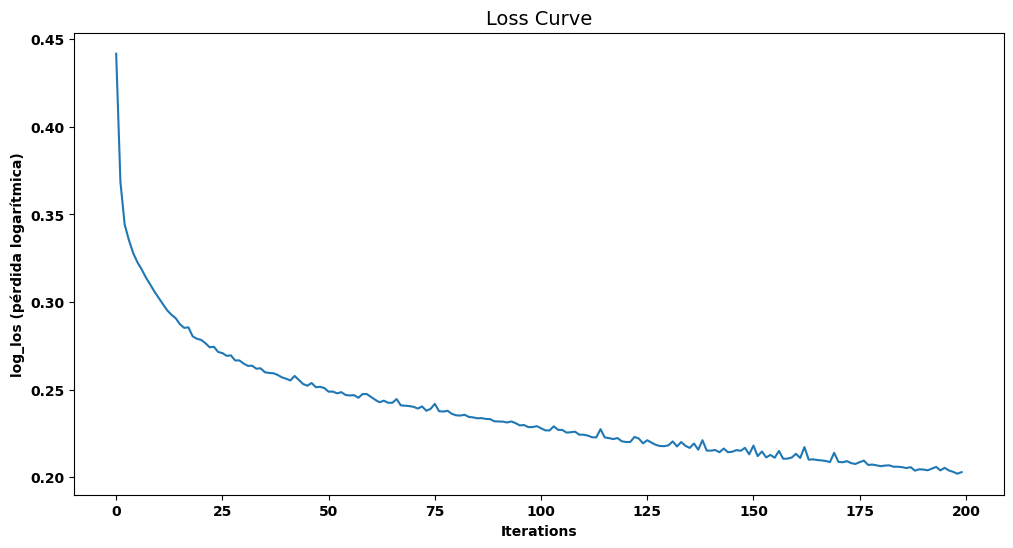

In [27]:
# Se puede consultar incluso el coste o la métrica de error que por defecto es 'log_loss' (entropía cruzada binaria)
# y su evolución durante las iteraciones de entrenamiento
plt.plot(clas_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('log_los (pérdida logarítmica)')
plt.show()

Se puede apreciar que las redes neuronales artificiales disponen de muchos ajustes y por lo tanto tienen **diversos hiperparámetros** como: 

* ``hidden_layer_sizes``: tupla, longitud = n_capas - 2, predeterminado = (100,). El i-ésimo elemento representa el número de neuronas en la i-ésima capa oculta.
* ``activation``:  {'identity', 'logistic', 'tanh', 'relu'}, predeterminado = 'relu'. La función de activación para las capas ocultas.
* ``solver``:  {'lbfgs', 'sgd', 'adam'}, predeterminado = 'adam'. El solucionador para la optimización del peso.
* ``max_iter``: int, predeterminado = 200. Número máximo de iteraciones. 
* ``alpha``: float, predeterminado = 0.0001. Parámetro de penalización L2 (término de regularización).
* ``tol``: float, predeterminado = 1e-4. Tolerancia para la optimización. Cuando la pérdida o la puntuación no mejoran al menos ``tol`` en ``n_iter_no_change`` iteraciones consecutivas se considera que se ha alcanzado la convergencia y se detiene el entrenamiento.


Procedemos a modificar un par de estos valores y volver a generar una red distinta: 

In [28]:
# Definimos otra red modificando los valores por defecto de algunos hiperparámetros
red_mlp = MLPClassifier(hidden_layer_sizes=(100,200,100),
                        max_iter=10000,
                        alpha=1e-5,
                        tol=1e-5,
                        random_state=100)


# Ajustamos el algoritmo al conjunto de datos de entrenamiento
red_mlp.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_mlp = red_mlp.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_mlp))

print(classification_report(y_test, y_pred_mlp))

print('AUC:', roc_auc_score(y_test, y_pred_mlp))

Acuuracy: 0.9150340066998274
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2404
           1       0.94      0.95      0.94      7447

    accuracy                           0.92      9851
   macro avg       0.89      0.88      0.88      9851
weighted avg       0.91      0.92      0.91      9851

AUC: 0.8750702412410988


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
red_mlp.__getstate__()

{'activation': 'relu',
 'solver': 'adam',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 10000,
 'loss': 'log_loss',
 'hidden_layer_sizes': (100, 200, 100),
 'shuffle': True,
 'random_state': 100,
 'tol': 1e-05,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 'feature_names_in_': array(['ALTITUD', 'Distancia_Pto_trafico1', 'Intensidad_Pto_trafico1',
        'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3',
        'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5',
        'Carga_Pto_trafico4', 'Carga_Pto_trafico3',
        'Intensidad_mediaR1_500', 'Intensidad_mediaR3_750_1000',
        'Intensidad_mediaR6_2000', 'Intensidad_minR1_500',
        'Intensidad_minR2_500_750', 'Intensidad_minR3_750_1000',
       

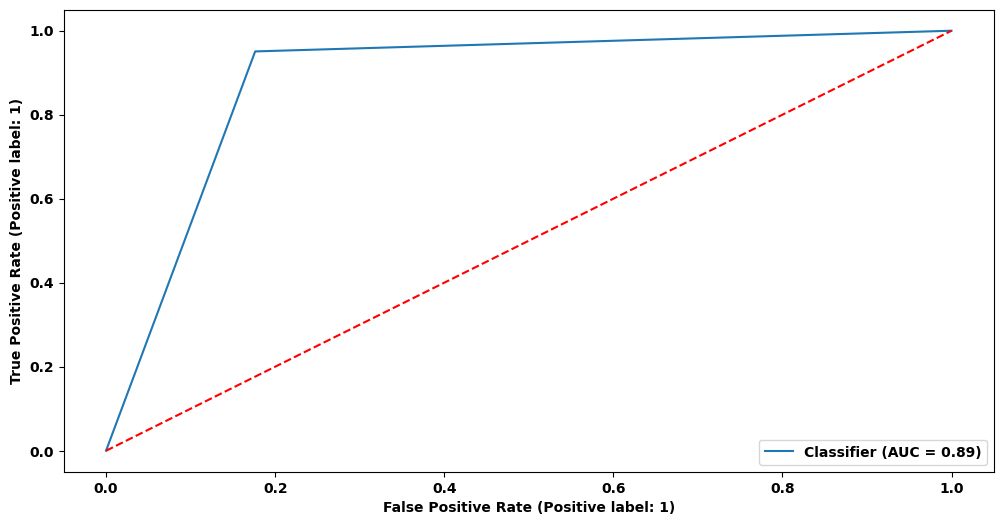

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_mlp)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.show()

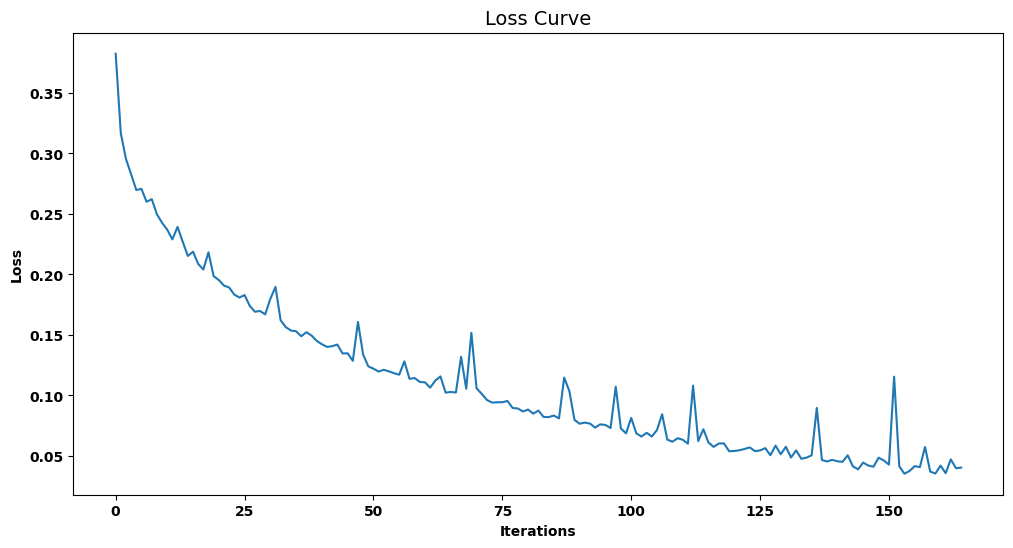

In [ ]:
# Se puede consultar incluso el coste (la métrica de error) y su evolución durante las iteraciones de entrenamiento
plt.plot(red_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

---

## Clasificación con Redes Neuronales profundas mediante ___Keras___

**[Keras](https://keras.io/)** es una librería de Python de código abierto (con licencia MIT) para facilitar el desarrollo de los modelos de __*Deep Learning*__. _Keras_ es un paquete ___minimalista___ que su principal objetivo es acelerar la generación de redes neuronales profundas.
 _Keras_ funciona como una _interfaz de uso intuitivo_ (__API__) que permite __acceder y trabajar a alto nivel__ con varios frameworks como _Theano_ y sobre todo __*`TensorFlow`*__.
 
_Keras_ se puede ejecutar sin problema sobre las CPU y también contra las __GPU__ que aumentan la eficiencia computacional en muchos casos.  En lugar de instalar los paquetes por separado, el enfoque recomendado es __instalar _Keras_ como parte de la instalación de _TensorFlow___. A partir de la versión 2.0, cuando instala _TensorFlow_, *Keras* también se instalará automáticamente.

In [ ]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

Podemos __importar__ y acceder a las funciones y los métodos de _Keras_ usando dos enfoques distintos:  

- mediante la librería ___Keras___ 
- A través de ___Tensorflow___

Lo importante es __ser consistente en todo el código__ que desarrollamos y **usar la misma manera** cada vez que importamos los objetos y las funciones de _Keras_ para evitar confusiones y hacer que el código sea más fácil de leer.

In [ ]:
import keras
print(keras.__version__)


2.15.0


In [ ]:
import tensorflow
print(tensorflow.keras.__version__)

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [ ]:
from tensorflow import keras as ks
print(ks.__version__)

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

_Keras_ como es de esperar y acorde con sus objetivos, tiene un __enfoque muy práctico__ a la hora de definir, compilar y ajustar las redes neuronales profundas. Principalmente se construyen las redes mediante modelos con una secuencia de capas, llamada tipo __`Secuencial`__.

In [29]:
from keras.models import Sequential

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks

Después de instanciar un modelo de la clase `Sequential`, debemos indicar **la capa de entrada (_Input Layer_)** que recibe los **valores que se vienen dado al inico** de una observación considerando como un **estímulo inicial**. Lógicamente, el número de las _variables de entrada (__features__)_ determina el tamaño de esta capa. 

In [30]:
# La dimensión de las observaciones
X_train.shape

(39403, 46)

In [31]:
from keras import Input

modelo_ks.add(Input(shape=(X_train.shape[1],)))

Después, se van añadiendo más capas en __el orden deseado__. Por ahora, utilizamos un tipo de capa llamada _capa densa (__Dense__)_ o completamente conectada. Una capa densa tiene una **cantidad específica de neuronas**, que es un parámetro que se elige en la definición de la capa. 

Este tipo de capas son las **más comunes** y se les conoce como _completamente conectada (__Fully-Connected__)_ porque cada neurona en la capa densa establece una conexión con todas las neuronas de entrada o de la capa anterior y con todas las neuronas de salida o de la capa posterior. 

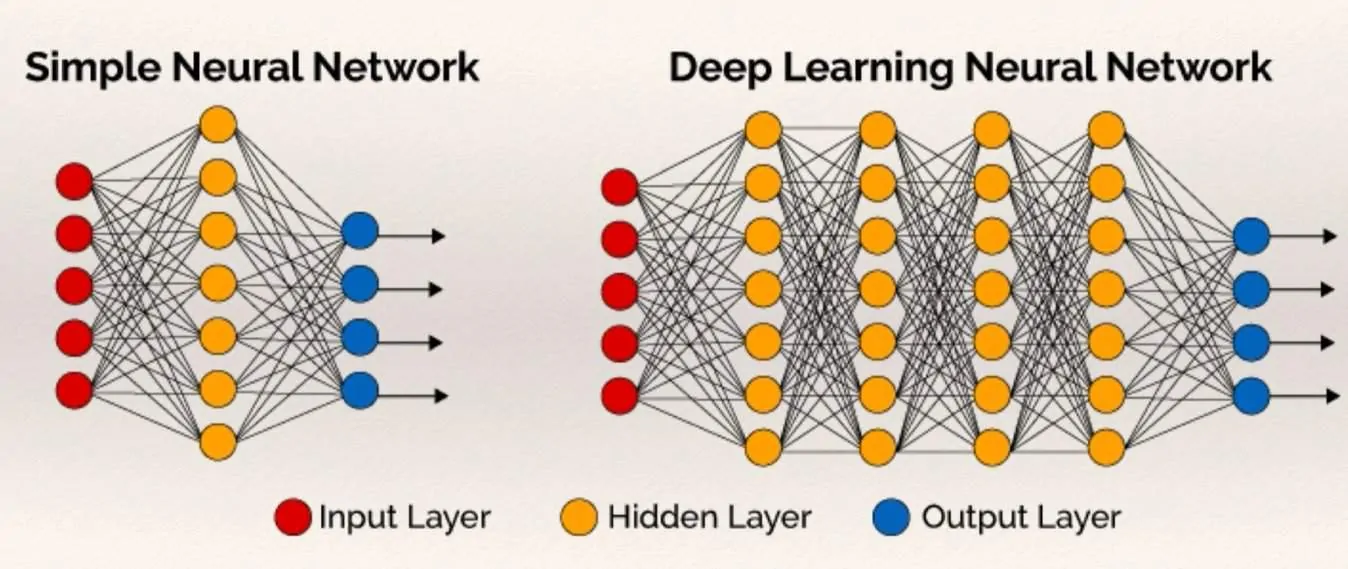

Se indican las __funciones de activación__ que se aplicarán a cada capa: 

In [32]:
from keras.layers import Dense

# Añadir las capas ocultas (Hidden Layers)
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))

Finalmente se define la última capa o la __capa de salida (Output Layer)__ que debe tener el tamaño de la salida del modelo.

In [33]:
# Definir la capa final (Ouput Layer)
modelo_ks.add(Dense(1, activation='sigmoid'))

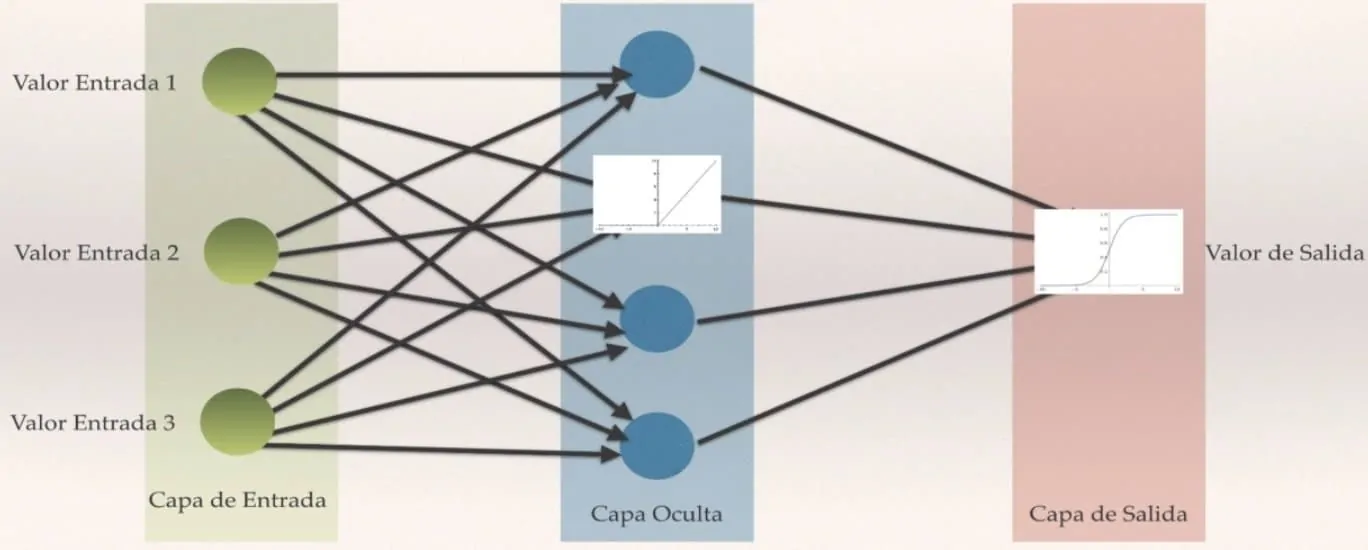


Una vez definida la estructura de la red, se __compila__ el modelo especificando una serie de __hiperparámetros__ como:

* ``loss``: La medida de __error__ o __la función de pérdida (*Loss function*)__. Por defecto se suele seleccionar `'binary_crossentropy'` que se conoce como ___log-loss___ o la entropía cruzada (_Cross-entropy_) que resume **la diferencia promedio entre las distribuciones de probabilidades reales y predichas** para predecir la clase 1.  
 
* ``optimizer``: El algoritmo de optimización. se utiliza comunmente `'Adam'` como el algoritmo de descenso de gradiente estocástico (___stochastic gradient descent___) con una eficiencia considerable.
* ``metrics``:  Añade una **lista de métricas** para que el modelo las evalúe durante el entrenamiento, a pesar de que **no influyen en el entrenamiento**. Se utiliza principalmente `'accuracy'` entre cualquier otra métrica de clasificación en este caso.

In [34]:
# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Podemos consultar todas las declaraciones realizadas respecto al modelo antes de seguir con el proceso de entrenamiento:

In [35]:
modelo_ks.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45101 (176.18 KB)
Trainable params: 45101 (176.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Después de especificar la estructura de la red y los ajustes del algoritmo de clasificación, procedemos a **ajustar el modelo** contra el conjunto de datos de entrenamiento **de forma iterativa** y considerando estos argumentos:  

* ``epochs``: Número de **iteraciones** que se van a realizar para **recorrer todo el conjunto de training**.  

* ``batch_size``: Número de muestras por actualización de gradiente o mejor dicho, la **cantidad de observaciones que se consideran antes de que se actualicen los pesos del modelo** dentro de cada _epoch_. Si no se especifica, el valor predeterminado de *batch_size* es __32__.

In [36]:
X_train.shape[0]/50

788.06

In [37]:
# Ajustar el modelo a los datos del entrenamiento.
modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10




789/789 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8461
Epoch 2/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2933 - accuracy: 0.8711
Epoch 3/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2766 - accuracy: 0.8771
Epoch 4/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2637 - accuracy: 0.8837
Epoch 5/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2525 - accuracy: 0.8886
Epoch 6/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2418 - accuracy: 0.8926
Epoch 7/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2327 - accuracy: 0.8970
Epoch 8/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2258 - accuracy: 0.9017
Epoch 9/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2174 - accuracy: 0.9056
Epoch 10/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2109 - accuracy: 0.9084


Ahora tenemos a nuestra red neronal **entrenada y ajustada** a los datos de entrenamiento. Podemos incluso consultar los parámetros o mejor dicho **los pesos de la red** 
 mediante el atributo **`.weights`**:

In [38]:
modelo_ks.weights

[<tf.Variable 'dense/kernel:0' shape=(46, 100) dtype=float32, numpy=
 array([[-0.0457255 , -0.11702662, -0.07104861, ..., -0.09385534,
          0.12957062,  0.08010375],
        [-0.01100035, -0.13522004, -0.2182474 , ...,  0.09191175,
          0.00581852, -0.0126189 ],
        [-0.11423519,  0.0632885 ,  0.4036978 , ...,  0.06272639,
         -0.18872282, -0.23741096],
        ...,
        [-0.09937329,  0.19795512, -0.26684088, ..., -0.10200106,
         -0.34391046, -0.00254619],
        [ 0.01718079, -0.16480489, -0.05340734, ...,  0.09506212,
         -0.3633234 , -0.18819082],
        [-0.24513485,  0.03829303,  0.18189377, ..., -0.13660032,
          0.05973923, -0.0806592 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.00762997, -0.03286385, -0.03284248, -0.0683872 , -0.0284357 ,
         0.07793195, -0.06953883, -0.07586559, -0.01984022,  0.06979147,
        -0.02822665, -0.00401419,  0.01417718,  0.08240773, -0.05215045,
     

Con el objetivo de evaluar el modelo, podemos **guardar la salida del paso de entrenamiento** para poder registrar las métricas evaluadas por _batch_ al finalizar cada _epoch_ y al mismo tiempo entrenar el modelo.

In [39]:
registros = modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
 67/789 [=>............................] - ETA: 1s - loss: 0.1927 - accuracy: 0.9119

789/789 [==============================] - 2s 2ms/step - loss: 0.2044 - accuracy: 0.9102
Epoch 2/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9151
Epoch 3/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1923 - accuracy: 0.9162
Epoch 4/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1859 - accuracy: 0.9200
Epoch 5/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1799 - accuracy: 0.9241
Epoch 6/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1767 - accuracy: 0.9234
Epoch 7/10
789/789 [==============================] - 2s 3ms/step - loss: 0.1736 - accuracy: 0.9265
Epoch 8/10
789/789 [==============================] - 2s 3ms/step - loss: 0.1658 - accuracy: 0.9285
Epoch 9/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1609 - accuracy: 0.9299
Epoch 10/10
789/789 [==============================] - 2s 2ms/step - loss: 0.1592 - accuracy: 0.9319


In [40]:
# Consultar la info registrada
print(registros.epoch)
print(registros.history)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{'loss': [0.2043841928243637, 0.1974250078201294, 0.19232818484306335, 0.18585622310638428, 0.1799190491437912, 0.17667768895626068, 0.17361149191856384, 0.1658036857843399, 0.16094492375850677, 0.1592046469449997], 'accuracy': [0.9101591110229492, 0.9151079654693604, 0.9161738753318787, 0.9200060963630676, 0.9241428375244141, 0.9234068393707275, 0.9264776706695557, 0.9285079836845398, 0.9299291968345642, 0.9319087266921997]}


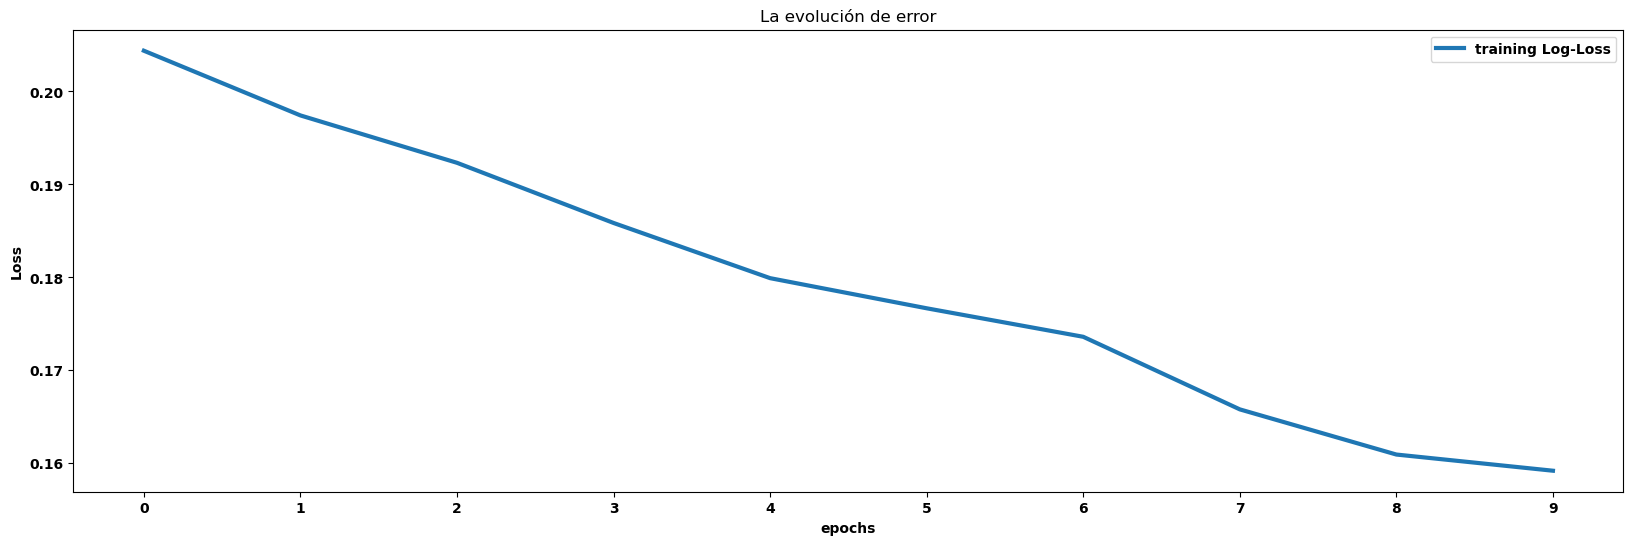

In [41]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

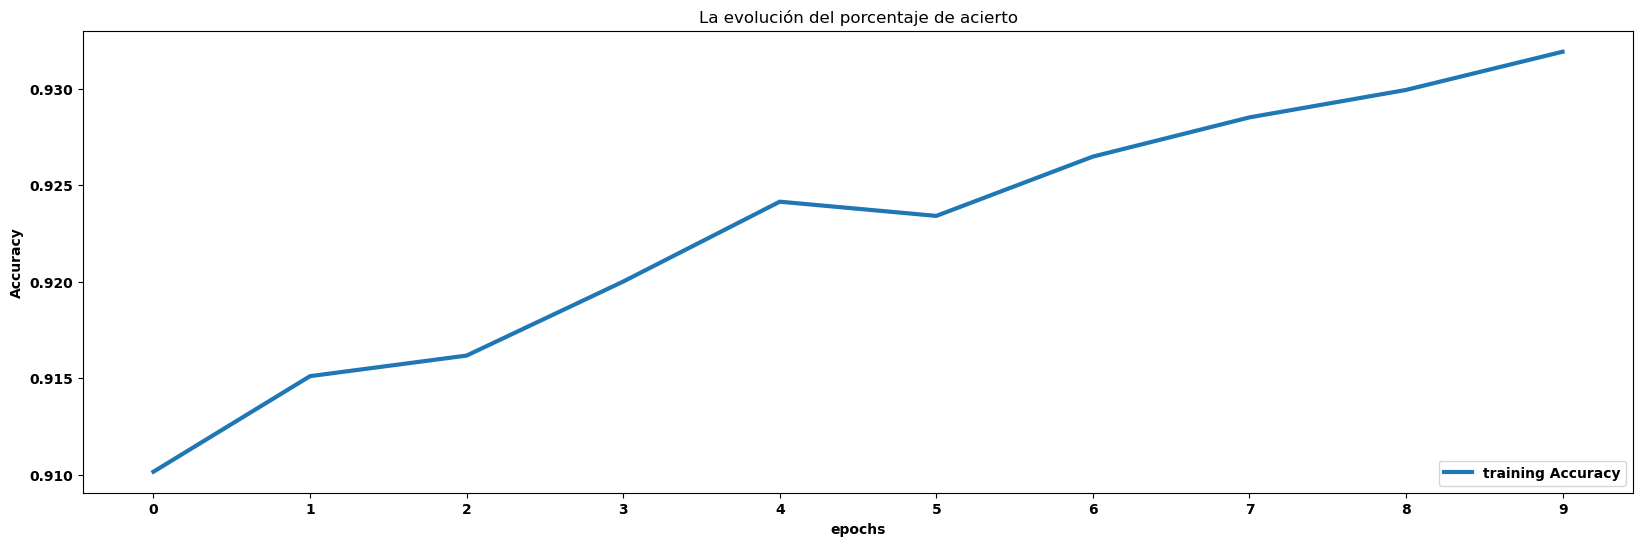

In [42]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Para los modelos desarrollados con _Keras_ podemos usar el método **`.evaluate`** para **evaluar directamente el rendimiento del modelo** sobre cualquier conjunto de datos sin sacar las predicciones explícitamente.

In [43]:
modelo_ks.evaluate(X_train, y_train)

1232/1232 [==============================] - 2s 2ms/step - loss: 0.1687 - accuracy: 0.9279


[0.16870498657226562, 0.9278988838195801]

In [44]:
_, accuracy_ks_train = modelo_ks.evaluate(X_train, y_train, batch_size=50)
print('Accuracy del modelo en trainig: %.3f' % accuracy_ks_train)

# El operador % aquí es un "string formatting operator" que se usa para dar formato a una cadena reemplazando el carácter % con un valor.

# El %.3f es un especificador de formato que le dice a Python que formatee el valor de "accuracy_ks" como un número de tipo "float" con 3 decimales.

 55/789 [=>............................] - ETA: 1s - loss: 0.1703 - accuracy: 0.9287

789/789 [==============================] - 2s 2ms/step - loss: 0.1687 - accuracy: 0.9279
Accuracy del modelo en trainig: 0.928


In [45]:
# Con este mismo método podemos sacar el rendimiento del modelo sobre el conjunto de datos de prueba (test)
_, accuracy_ks_test = modelo_ks.evaluate(X_test, y_test, batch_size=50)
print('Accuracy del modelo en test: %.3f' % accuracy_ks_test)

  1/198 [..............................] - ETA: 6s - loss: 0.1749 - accuracy: 0.9200

198/198 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9083
Accuracy del modelo en test: 0.908


Aquí también podemos generar las predicciones del modelo usando el método **`.predict`** sobre el modelo entrenado.

In [46]:
# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_ks = modelo_ks.predict(X_test)
y_pred_ks

308/308 [==============================] - 1s 2ms/step


array([[0.70903367],
       [0.99999845],
       [0.99998546],
       ...,
       [0.9999985 ],
       [0.9875493 ],
       [0.9979844 ]], dtype=float32)

Analizamos la salida directa del modelo que al parecer es en forma de probabilidades que tiene cada observación para pertenecer a la clase 1.

In [47]:
pd.Series(y_pred_ks).describe()

ValueError: Data must be 1-dimensional, got ndarray of shape (9851, 1) instead

Vemos que la salida no se puede convertir directamente a una _Serie_ de _Pandas_ por su dimensión.

In [48]:
# La salida es un array bidimensional
print(y_pred_ks.shape)
print(y_pred_ks.ndim)

(9851, 1)
2


In [49]:
# Redimensionar y reordenar el array
y_pred_ks.reshape(-1)

array([0.70903367, 0.99999845, 0.99998546, ..., 0.9999985 , 0.9875493 ,
       0.9979844 ], dtype=float32)

In [50]:
# Aplanar los valores del array
y_pred_ks.flatten()

array([0.70903367, 0.99999845, 0.99998546, ..., 0.9999985 , 0.9875493 ,
       0.9979844 ], dtype=float32)

In [51]:
# Consultar las características estadística de la salida
pd.Series(y_pred_ks.flatten()).describe().round(4)

count    9851.0000
mean        0.7828
std         0.3504
min         0.0000
25%         0.6992
50%         0.9915
75%         0.9999
max         1.0000
dtype: float64

<Axes: >

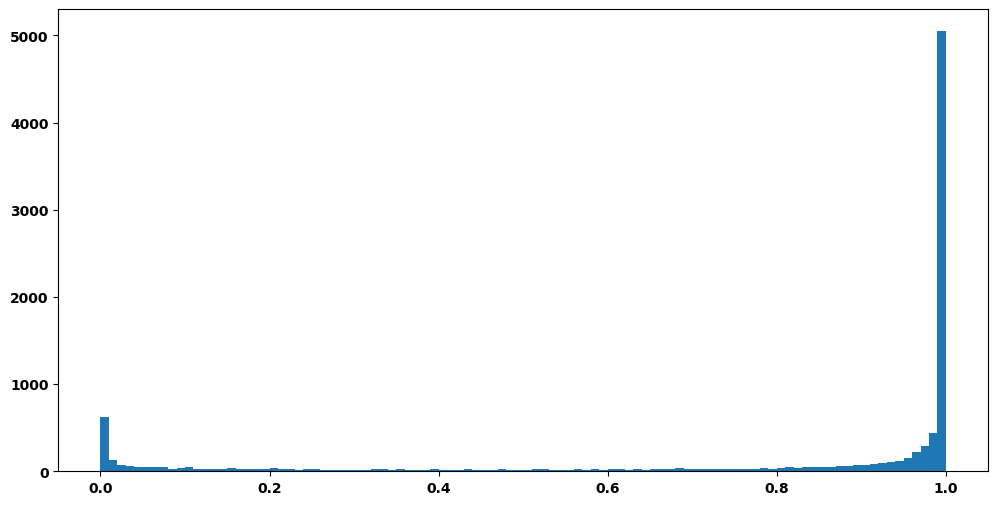

In [52]:
# Consultar el histograma y analizar la distribución de las predicciones
pd.Series(y_pred_ks.reshape(-1)).hist(bins=100, grid=False)

Evidentemente para poder comparar los valores predichos con los reales debemos filtrar las predicciones, cortando las estimaciones por un umbral (_threshold_).

In [53]:
np.where(y_pred_ks<0.5, 0, 1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [54]:
threshold = 0.5
y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)
y_pred_keras

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [55]:
# Ahora calculamos las métricas del siempre con las funciones de sklearn
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Acuuracy: 0.90833417927114
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      2404
           1       0.92      0.96      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.89      0.85      0.87      9851
weighted avg       0.91      0.91      0.91      9851

AUC: 0.849230401772079


En función del umbral que se considera para filtrar la salida cruda del modelo, las métricas del modelo pueden variar algo.

In [56]:
threshold = 0.75
y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Acuuracy: 0.9032585524312252
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2404
           1       0.95      0.92      0.94      7447

    accuracy                           0.90      9851
   macro avg       0.86      0.88      0.87      9851
weighted avg       0.91      0.90      0.90      9851

AUC: 0.882493190370018


El mejor valor de umbral **depende del caso de uso específico** y la compensación (_trade-off_) deseada entre la tasa de verdaderos positivos (_TPR_) y la tasa de falsos positivos (_FPR_).

Una forma de encontrar el umbral óptimo para un modelo de clasificación binaria sería analizar la curva de características operativas del receptor (**ROC**). La curva _ROC_ traza la tasa de verdaderos positivos contra la tasa de falsos positivos para un rango de valores de umbral, y **el umbral óptimo** corresponde al punto en la curva *ROC* que está **más cerca de la esquina superior izquierda** (es decir, el punto con el *TPR* más alto y el *FPR* más bajo).

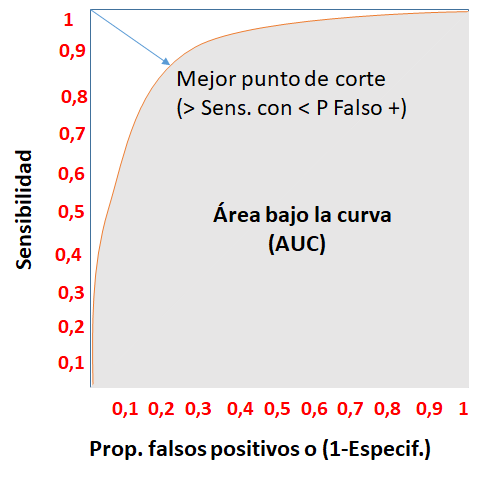

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
indice_umbral = np.argmax(tpr - fpr)

# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]

print("El mejor umbral sería: ", umbral_opt)


El mejor umbral sería:  0.8730382


In [58]:
# Ahora volvemos a sacar las métricas usando el umbral "óptimo"
threshold = umbral_opt

y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Acuuracy: 0.8858999086387169
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      2404
           1       0.97      0.88      0.92      7447

    accuracy                           0.89      9851
   macro avg       0.84      0.89      0.86      9851
weighted avg       0.90      0.89      0.89      9851

AUC: 0.8919980451988282


Podemos juntar todos los pasos implicados en el entrenamiento y validación del modelo.

In [59]:
# importar los módulos, las clases y las funciones a utilizar
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Declarar el modelo que se va a crear
modelo_ks = Sequential()

modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

# lanzamos las predicciones para el conjunto de test
y_pred_ks = modelo_ks.predict(X_test)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)

# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4700      
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45101 (176.18 KB)
Trainable params: 45101 (176.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
130/789 [===>..........................] - ETA: 2s - loss: 0.4353 - accuracy: 0.8011 - auc: 0.7975

789/789 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.8454 - auc: 0.8836
Epoch 2/10
789/789 [==============================] - 2s 3ms/step - loss: 0.2976 - accuracy: 0.8694 - auc: 0.9178
Epoch 3/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2814 - accuracy: 0.8774 - auc: 0.9275
Epoch 4/10
789/789 [==============================] - 2s 3ms/step - loss: 0.2687 - accuracy: 0.8802 - auc: 0.9344
Epoch 5/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2595 - accuracy: 0.8862 - auc: 0.9390
Epoch 6/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2465 - accuracy: 0.8912 - auc: 0.9455
Epoch 7/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2392 - accuracy: 0.8952 - auc: 0.9487
Epoch 8/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2254 - accuracy: 0.9013 - auc: 0.9548
Epoch 9/10
789/789 [==============================] - 2s 2ms/step - loss: 0.2169 - accuracy: 0.9051

Se puede observar que los resultados generados se pueden variar un poco en cada ejecución. Para tener una cierta __reproducibilidad__ en estos análisis podemos **fijar la semilla de diferentes procesos y cálculos estocásticos** a distintos niveles que utilizan varios algoritmos durante el proceso de entrenamiento:

- A nivel de procesos en __`python`__:   Ajustar el generador aleatorio `random` en un valor fijo.
- A nivel de procesos en __`numpy`__:   Ajustar el generador aleatorio `np.random` en un valor fijo.
- A nivel de procesos en __`tensorflow`__:   Ajustar el generador aleatorio `tf.random` en un valor fijo.


In [60]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla_16_1 = 333
random.seed(semilla_16_1)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla_16_1)  # Fijar la semilla a nivel de `numpy`
tf.random.set_seed(semilla_16_1)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_ks = Sequential()

modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, epochs=50, batch_size=100)

# Calcular las predicciones para el conjunto de test
y_pred_ks = modelo_ks.predict(X_test)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4700      
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 45101 (176.18 KB)
Trainable params: 45101 (176.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
395/395 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8349 - auc: 0.8697
Epoch 2/50
395/395 [==============

Cuando tengamos un númeo mayor de _epochs_ tendrémos una mejor representación en las gráficas de _Loss_ y las métricas del modelo. 

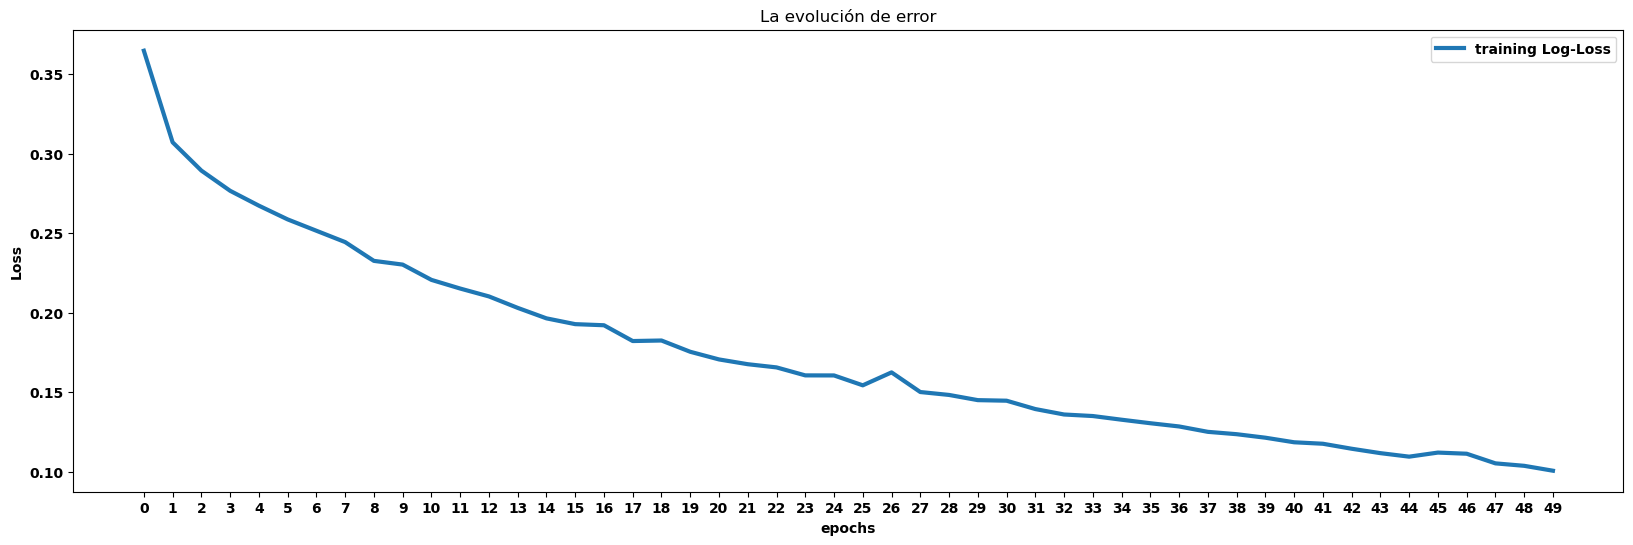

In [61]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

El método de **`.fit`** nos permite pasar un conjunto de _validación_, a parte de los datos de _training_, con el objetivo de reservar una parte de los datos y registrar en cada _epoch_ el rendimiento del modelo en los dos conjuntos de datos. 

In [62]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla_16_1 = 333
random.seed(semilla_16_1)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla_16_1)  # Fijar la semilla a nivel de `numpy`
tf.random.set_seed(semilla_16_1)  # Fijar la semilla a nivel de `tensorflow`

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

# Calcular las predicciones para el conjunto de test
y_pred_ks = modelo_ks.predict(X_test)

# Calcular el mejor umbral
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones  y evaluar el modelo
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45101 (176.18 KB)
Trainable params: 45101 (176.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
395/395 [==============================] - 2s 4ms/step - loss: 0.3646 - accuracy: 0.8349 - auc: 0.8697 - val_loss: 0.3139 - val_accuracy: 0.8613 - val_auc: 0.9097
Epoch 2/50
395/395 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8648 - auc: 0.9123 - val_loss: 0.3001 - val_accuracy: 0.8672 - val_auc: 0.9224
Epoch 3/50
395/395 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8718 - auc: 0.9235 - val_loss: 0.2880 - val_accuracy: 0.8718 - val_auc: 0.9253
Epoch 4/50
395/395 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8774 - auc: 0.9304 - val_loss: 0.3166 - val_accuracy: 0.8555 - val_auc: 0.9299
Epoch 5/50
395/395 [==============================] - 1s 3ms/step - loss: 0.2672 - accuracy: 0.8814 - auc: 0.9352 - val_loss: 0.2860 - val_accuracy: 0.8757 - val_auc: 0.9358
Epoch 6/50
395/395 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.8854 - auc: 0.9396 - val_loss: 0.27

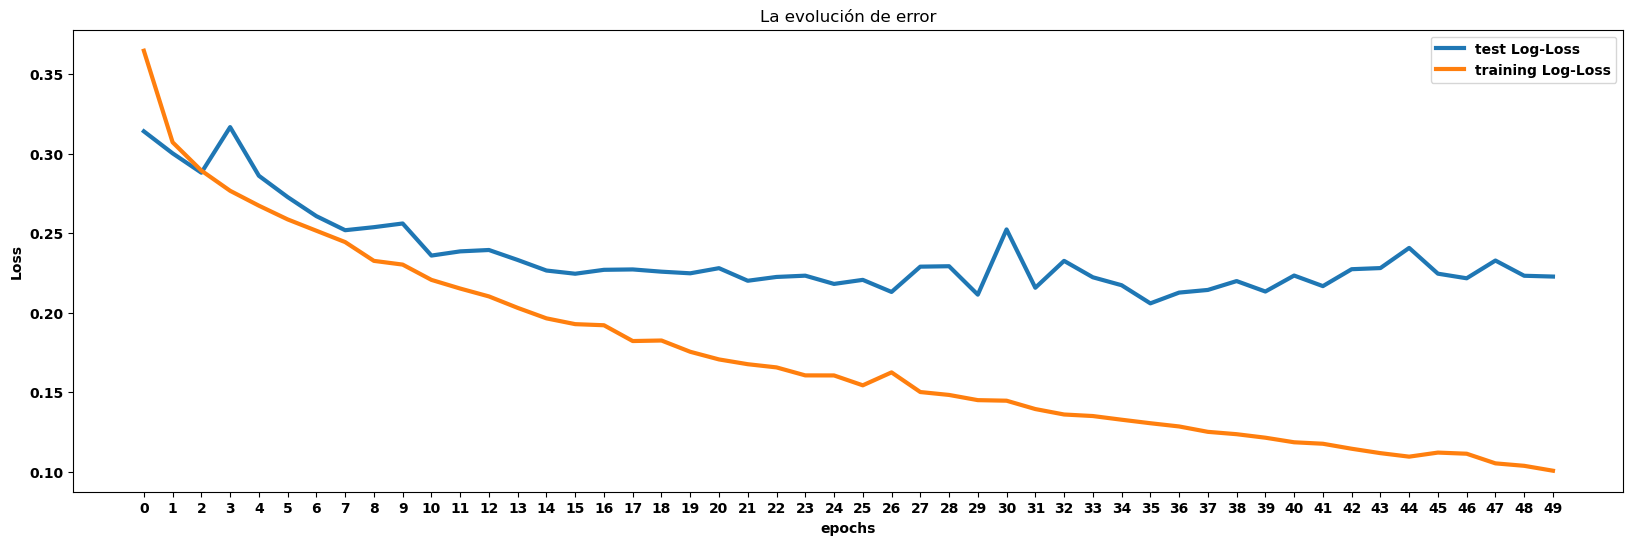

In [63]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

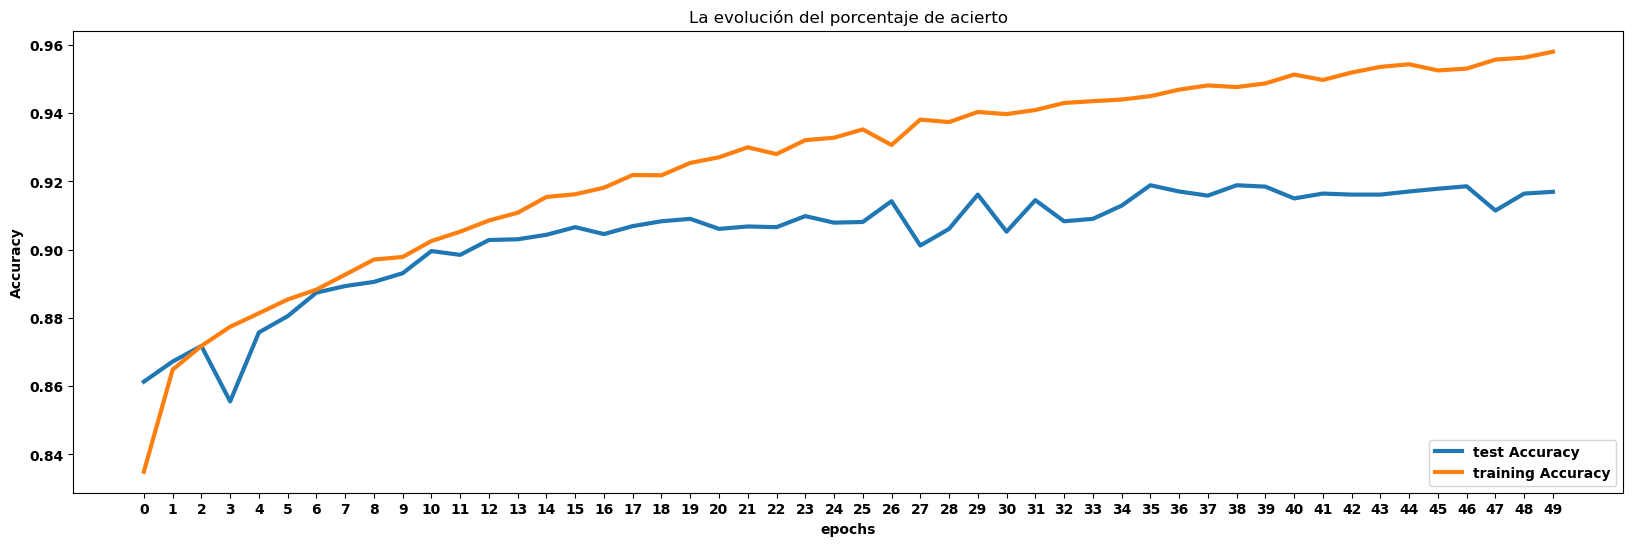

In [64]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

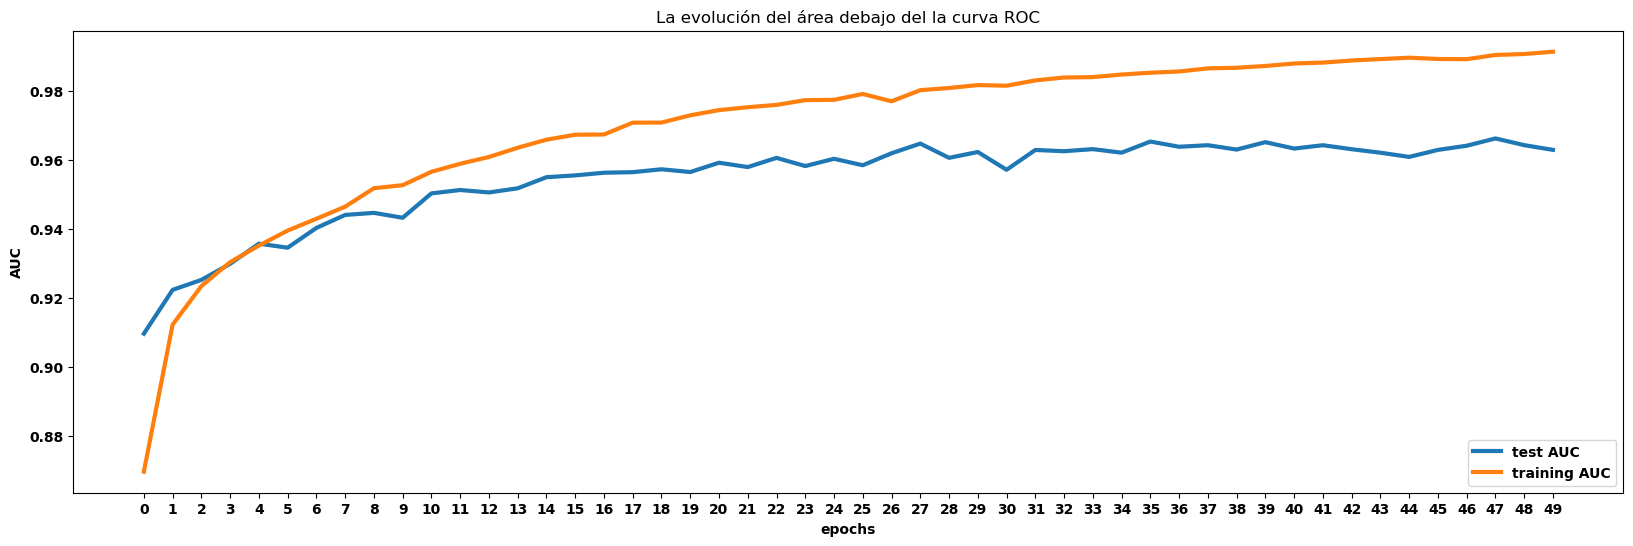

In [65]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_auc'], linewidth=3, label='test AUC')
plt.plot(registros.epoch, registros.history['auc'], linewidth=3, label='training AUC')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('La evolución del área debajo del la curva ROC')
plt.legend(loc = 'lower right')
plt.show()

Volvemos a juntar todos los pasos de generación y evaluación del modelo, silenciando el proceso de ajuste de la red indicando **`verbose=0`**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45101 (176.18 KB)
Trainable params: 45101 (176.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


308/308 [==============================] - 1s 2ms/step
El mejor umbral sería:  0.81092745
Acuuracy: 0.8956451121713531
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      2404
           1       0.97      0.89      0.93      7447

    accuracy                           0.90      9851
   macro avg       0.85      0.90      0.87      9851
weighted avg       0.91      0.90      0.90      9851

AUC: 0.9029506516041144


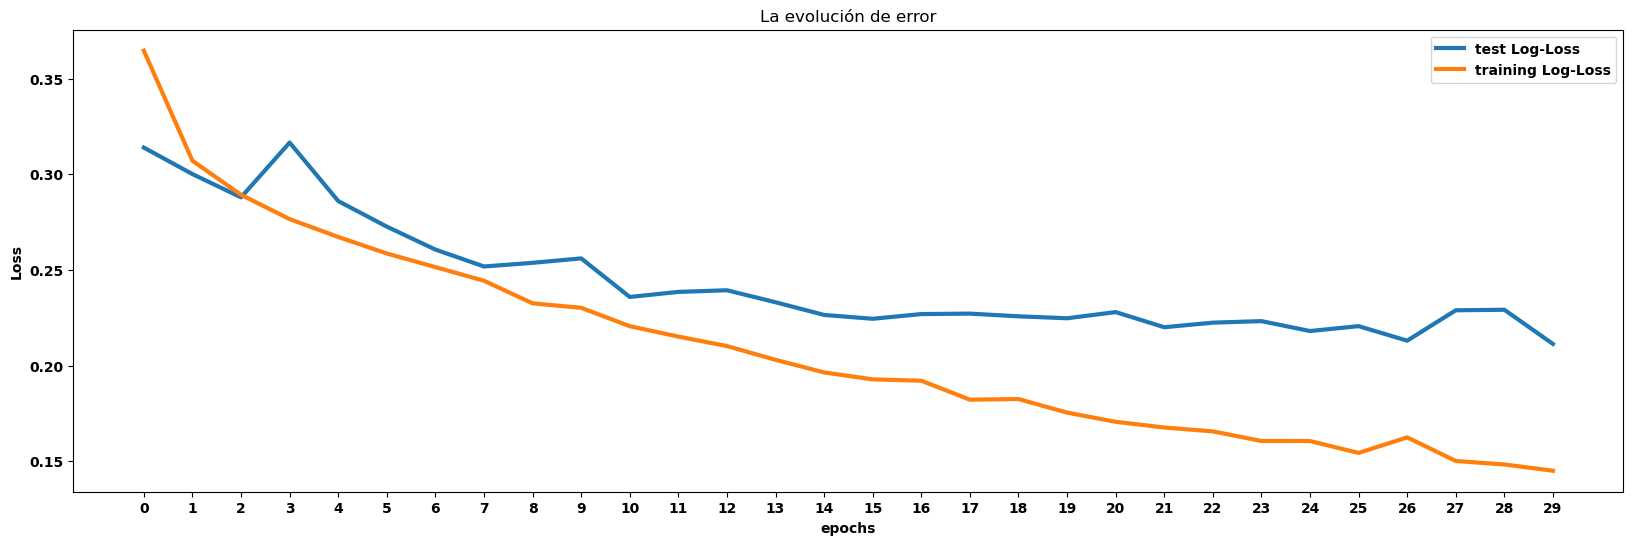

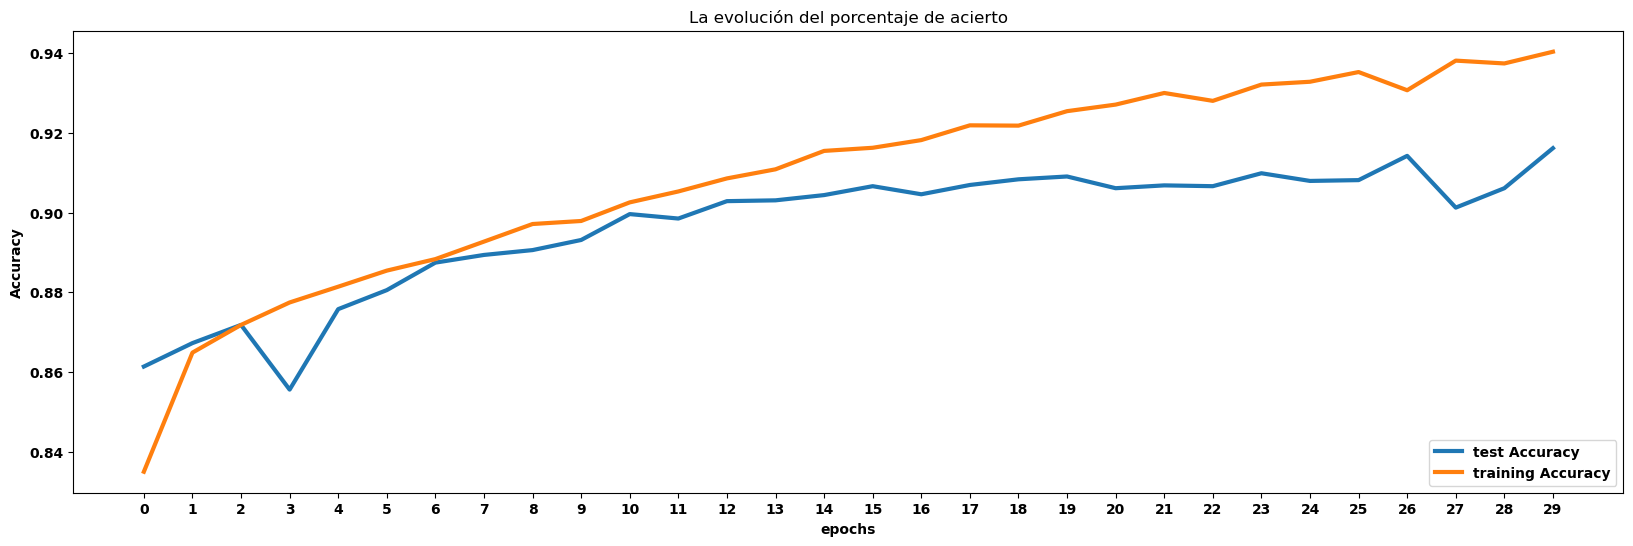

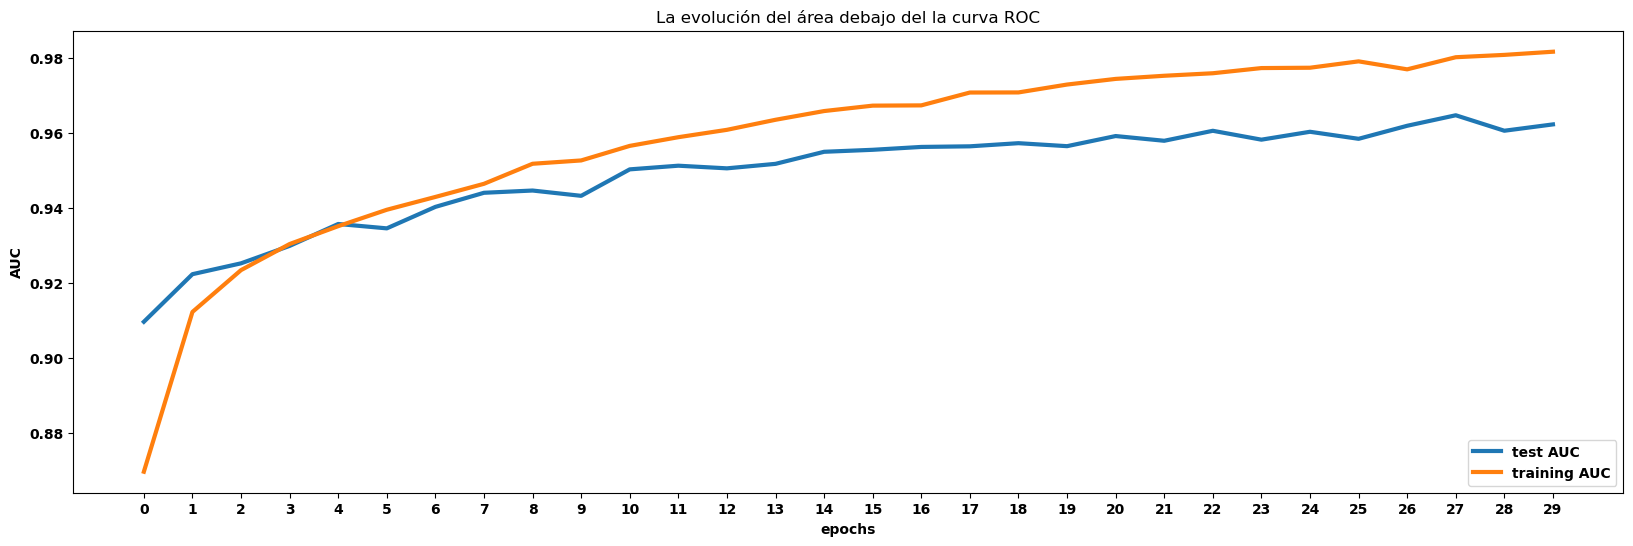

In [66]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla_16_1 = 333
random.seed(semilla_16_1)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla_16_1)  # Fijar la semilla a nivel de `numpy`
tf.random.set_seed(semilla_16_1)  # Fijar la semilla a nivel de `tensorflow`

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100, verbose=0)

# Calcular las predicciones para el conjunto de test
y_pred_ks = modelo_ks.predict(X_test)

# Calcular el mejor umbral
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones  y evaluar el modelo
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

# Graficamos la evolución del área debajo del la curva ROC
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['val_auc'], linewidth=3, label='test AUC')
plt.plot(registros.epoch, registros.history['auc'], linewidth=3, label='training AUC')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('La evolución del área debajo del la curva ROC')
plt.legend(loc = 'lower right')
plt.show()


---

In [67]:
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

### **`Ejercicio 16.1`**

Saca la gráfica del ***Learning Curve*** con la estructura del último modelo analizado y creado en la sesión, definiendo y aplicando una función nueva considerando los siguientes puntos:  

- La función toma solamente una entrada para el hiperparámetro `epochs`. Utiliza la función para **dibujar tres diferentes curvas de aprendizaje** para distintos números de iteraciones (_`epochs`_: `{10, 30, 50}`). Después **explica los resultados y compara** las curvas obtenidas.  

- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (poniendo `umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de `100` muestras para los modelos que se van a ajustar)

In [68]:
# Solución
# Ejercicio 16.1
def curva_aprendizaje_16_1(epochs: int):
    clear_session()

    semilla_16_1 = 333
    random.seed(semilla_16_1)
    np.random.seed(semilla_16_1)
    tf.random.set_seed(semilla_16_1)

    num_samples_16_1 = np.linspace(100, X_train.shape[0]).astype(int)
    train_score_16_1 = np.zeros(num_samples_16_1.size)
    test_score_16_1 = np.zeros(num_samples_16_1.size)

    modelo_ks_16_1 = Sequential()
    modelo_ks_16_1.add(Input(shape=(X_train.shape[1],)))
    modelo_ks_16_1.add(Dense(100, activation='relu'))
    modelo_ks_16_1.add(Dense(200, activation='relu'))
    modelo_ks_16_1.add(Dense(100, activation='relu'))
    modelo_ks_16_1.add(Dense(1, activation='sigmoid'))
    modelo_ks_16_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

    for i in range(num_samples_16_1.size):
        modelo_ks_16_1.fit(X_train[:num_samples_16_1[i]], y_train[:num_samples_16_1[i]], epochs=epochs, batch_size=100, verbose=0)

        y_pred_ks_train = modelo_ks_16_1.predict(X_train[:num_samples_16_1[i]])
        y_pred_train = np.where(y_pred_ks_train < 0.5, 0, 1)

        y_pred_ks_test = modelo_ks_16_1.predict(X_test)
        y_pred_test = np.where(y_pred_ks_test < 0.5, 0, 1)

        train_score_16_1[i] = accuracy_score(y_train[:num_samples_16_1[i]], y_pred_train)
        test_score_16_1[i] = accuracy_score(y_test, y_pred_test)

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_16_1[-1]-test_score_16_1[-1])

    plt.figure(figsize=(20,6))
    plt.plot(num_samples_16_1, test_score_16_1, linewidth=3, label='Test Accuracy')
    plt.plot(num_samples_16_1, train_score_16_1, linewidth=3, label='Train Accuracy')
    plt.plot(num_samples_16_1[np.argmax(test_score_16_1)], max(test_score_16_1),
            marker='o', color = "red", label="Max Accuracy")
    plt.xticks(np.linspace(100, X_train.shape[0], 15).astype(int))
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


308/308 [==============================] - 0s 2ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08372226055545862


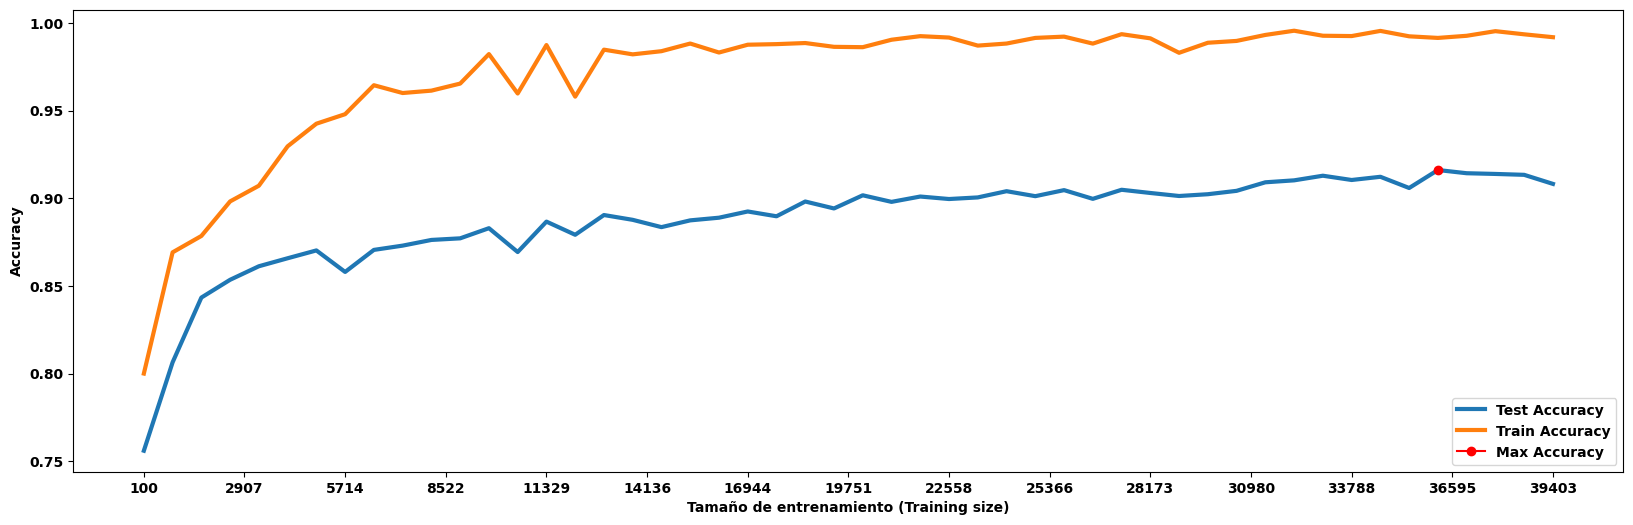

In [69]:
curva_aprendizaje_16_1(10)

308/308 [==============================] - 1s 3ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08788447036026492


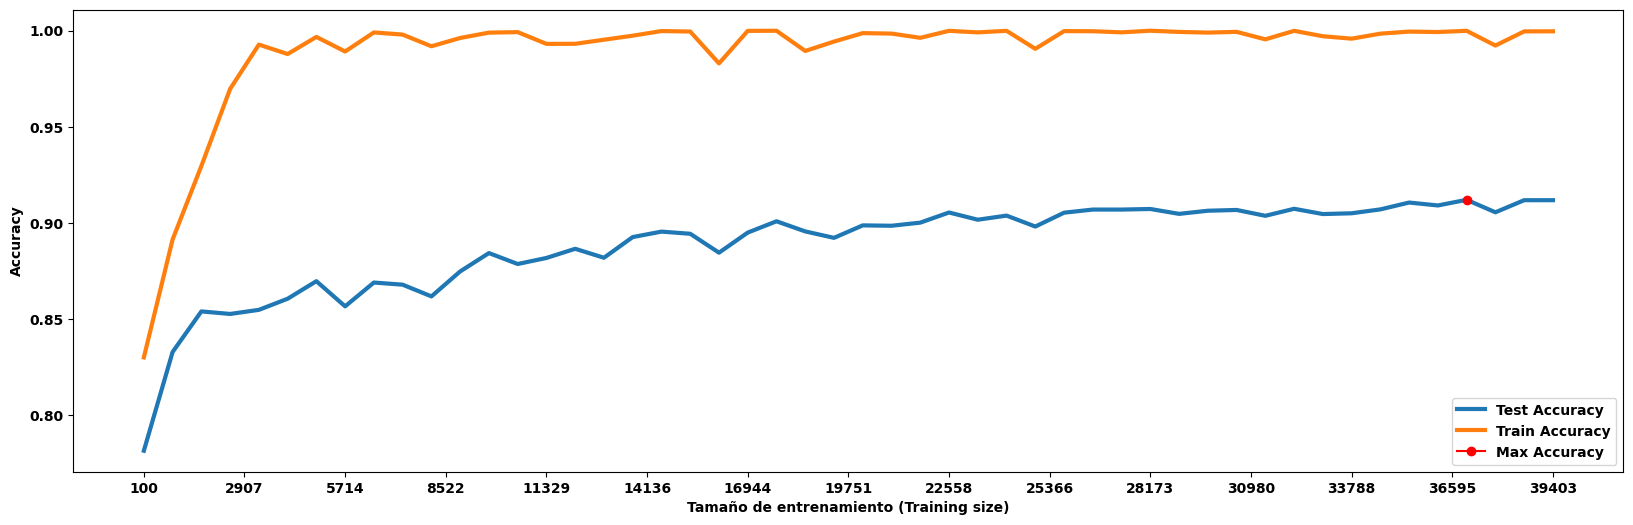

In [70]:
curva_aprendizaje_16_1(30)

308/308 [==============================] - 1s 2ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08821439447771795


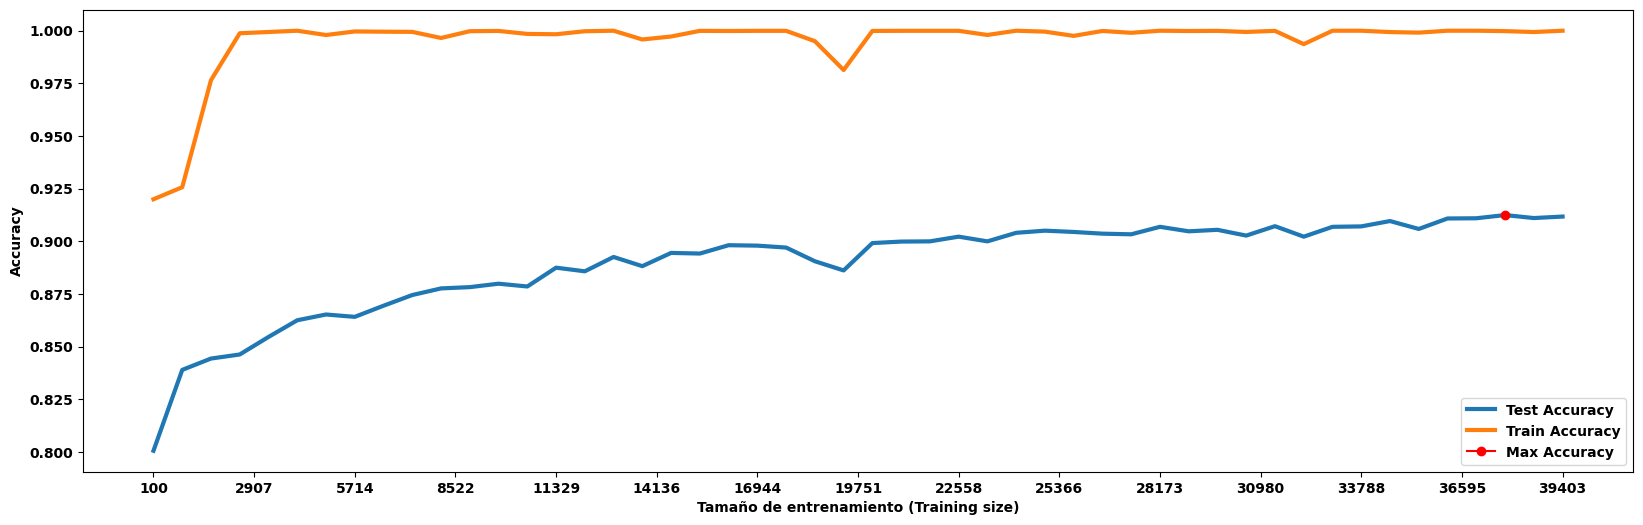

In [71]:
curva_aprendizaje_16_1(50)

> #### Explicación 16.1
> Para las 3 curvas de aprenzidaje de los 3 valores distintos de iteracción, podemos observar que la curva tiene un **comportamiento algo similar**. Para la gráfica del subconjunto de test, en las tres curvas, se presenta una tendencia ascendente, aunque nada muy sobresaliente. 
> Tambien podemos observar que en todas **el gap se reduce poco a poco**, pero aun les queda mucho por que las gráficas de cada curva **convergan**.
> **Ninguna** de las tres curvas **presenta un riesgo de overfitting**, no se puede ver ningun sobreajuste clato en ninguna de ellas, y tambien podemos observar que para las respectivas gráficas del subconjunto de test, los valores de **Accuracy** que presentan no son nada malos (en torno a **0.9**).
>
> En general son curvas de aprendizaje **muy parejas** en cuanto a forma, pero que no presentan una curva de aprendizaje excesivamente llamativa por ser buena. Sería necesario seguir analizando el modelo con más datos de entrenamiento para conocer como se desarrolla.

---

### **`Ejercicio 16.2`**

**`16.2.1`** Saca la gráfica de ***Complexity Curve*** con la estructura del último modelo analizado y creado en la sesión, considerando los siguientes puntos. Analiza la curva y **explica** qué valor sería mejor según este análisis para el número de las iteraciones:  

- Considera el siguiente rango para asignar al único hiperparámetro que se va a analizar en esta gráfica (número de iteraciones), usando las funciones de ___numpy___:
  - `epochs`: `{10,  20,  30,  40,  50,  60,  70,  80,  90, 100}`
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (`umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)


**`16.2.2`** Saca la gráfica de ***Complexity Curve*** y analiza los resultados al igual que el punto anterior (`16.2.1`), **excepto la métrica de clasificación**, considerando el siguiente punto:  

- La curva muestra la evolución de `AUC` en vez de _accuracy_, tanto para el conjunto de _training_ como para el dataset de _test_  

**`16.2.3`** Analizando los resultados de todos los puntos anteriores, **explica** cuál sería el número de iteraciones que finalmente sugieres para asignar **como el valor óptimo** de este hiperparámetro.  


308/308 [==============================] - 1s 2ms/step
El mejor valor de epochs podría ser = 70  que consigue un Accuracy = 0.92142929651812


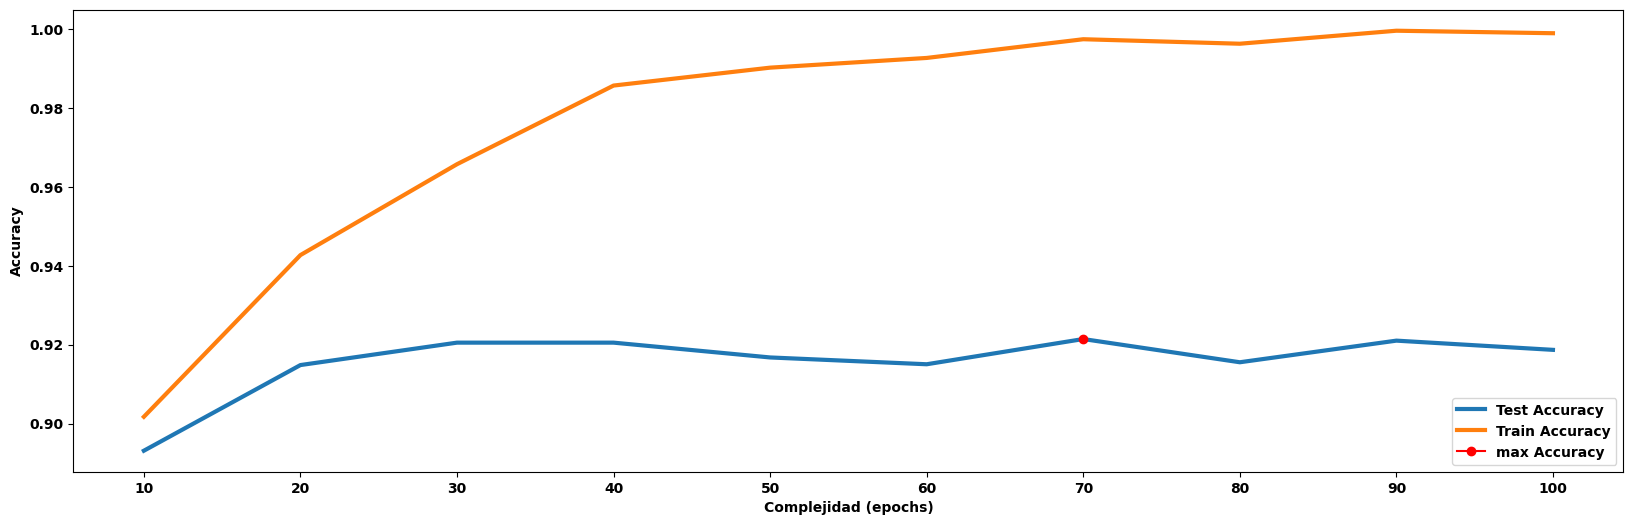

In [74]:
# Solución
# Ejercicio 16.2.1
clear_session()

semilla_16_2 = 333
random.seed(semilla_16_2)
np.random.seed(semilla_16_2)
tf.random.set_seed(semilla_16_2)

epochs_16_2 = np.arange(10, 101, 10)
train_score_16_2 = np.zeros(epochs_16_2.size)
test_score_16_2 = np.zeros(epochs_16_2.size)

modelo_ks_16_2 = Sequential()
modelo_ks_16_2.add(Input(shape=(X_train.shape[1],)))
modelo_ks_16_2.add(Dense(100, activation='relu'))
modelo_ks_16_2.add(Dense(200, activation='relu'))
modelo_ks_16_2.add(Dense(100, activation='relu'))
modelo_ks_16_2.add(Dense(1, activation='sigmoid'))
modelo_ks_16_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

for i in range(epochs_16_2.size):
    modelo_ks_16_2.fit(X_train, y_train, epochs=epochs_16_2[i], batch_size=100, verbose=0)

    y_pred_ks_train_16_2 = modelo_ks_16_2.predict(X_train)
    y_pred_train_16_2 = np.where(y_pred_ks_train_16_2 < 0.5, 0, 1)

    y_pred_ks_test_16_2 = modelo_ks_16_2.predict(X_test)
    y_pred_test_16_2 = np.where(y_pred_ks_test_16_2 < 0.5, 0, 1)

    train_score_16_2[i] = accuracy_score(y_train, y_pred_train_16_2)
    test_score_16_2[i] = accuracy_score(y_test, y_pred_test_16_2)

print("El mejor valor de epochs podría ser =", epochs_16_2[np.argmax(test_score_16_2)],
      " que consigue un Accuracy =", max(test_score_16_2))

plt.figure(figsize=(20,6))
plt.plot(epochs_16_2, test_score_16_2, linewidth=3, label='Test Accuracy')
plt.plot(epochs_16_2, train_score_16_2, linewidth=3, label='Train Accuracy')
plt.plot(epochs_16_2[np.argmax(test_score_16_2)], max(test_score_16_2),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(epochs_16_2)
plt.xlabel('Complejidad (epochs)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

> #### Explicación 16.2.1
> En términos generales, todos los rangos de epochs que hemos analizado en la curva presentan métricas no muy distintas, con valores de accuracy que varían en menor de 0.03 puntos.
>
> El valor de epochs que presenta las mejores métricas de Accuracy es **70**, con un valor de Accuracy de **0.92** aproximadamente. Aunque se encuentra en un rango muy parecido junto a valores de epochs como 30 o 40.

308/308 [==============================] - 1s 4ms/step
El mejor valor de epochs podría ser = 70  que consigue un AUC = 0.8933846882919945


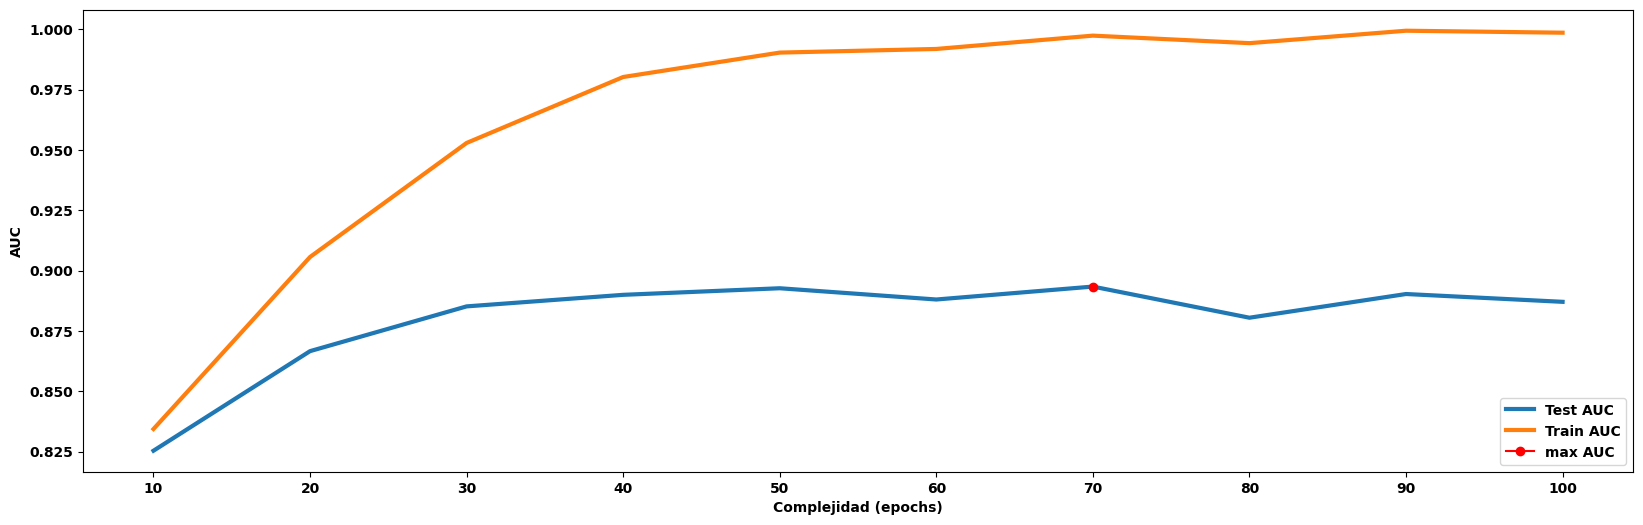

In [75]:
# Solución
# Ejercicio 16.2.2
clear_session()

semilla_16_2_2 = 333
random.seed(semilla_16_2_2)
np.random.seed(semilla_16_2_2)
tf.random.set_seed(semilla_16_2_2)

epochs_16_2_2 = np.arange(10, 101, 10)
train_score_16_2_2 = np.zeros(epochs_16_2_2.size)
test_score_16_2_2 = np.zeros(epochs_16_2_2.size)

modelo_ks_16_2_2 = Sequential()
modelo_ks_16_2_2.add(Input(shape=(X_train.shape[1],)))
modelo_ks_16_2_2.add(Dense(100, activation='relu'))
modelo_ks_16_2_2.add(Dense(200, activation='relu'))
modelo_ks_16_2_2.add(Dense(100, activation='relu'))
modelo_ks_16_2_2.add(Dense(1, activation='sigmoid'))
modelo_ks_16_2_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

for i in range(epochs_16_2_2.size):
    modelo_ks_16_2_2.fit(X_train, y_train, epochs=epochs_16_2_2[i], batch_size=100, verbose=0)

    y_pred_ks_train = modelo_ks_16_2_2.predict(X_train)
    y_pred_train = np.where(y_pred_ks_train < 0.5, 0, 1)

    y_pred_ks_test = modelo_ks_16_2_2.predict(X_test)
    y_pred_test = np.where(y_pred_ks_test < 0.5, 0, 1)

    train_score_16_2_2[i] = roc_auc_score(y_train, y_pred_train)
    test_score_16_2_2[i] = roc_auc_score(y_test, y_pred_test)

print("El mejor valor de epochs podría ser =", epochs_16_2_2[np.argmax(test_score_16_2_2)],
      " que consigue un AUC =", max(test_score_16_2_2))

plt.figure(figsize=(20,6))
plt.plot(epochs_16_2_2, test_score_16_2_2, linewidth=3, label='Test AUC')
plt.plot(epochs_16_2_2, train_score_16_2_2, linewidth=3, label='Train AUC')
plt.plot(epochs_16_2_2[np.argmax(test_score_16_2_2)], max(test_score_16_2_2),
        marker='o', color = "red", label="max AUC")
plt.xticks(epochs_16_2_2)
plt.xlabel('Complejidad (epochs)')
plt.ylabel('AUC')
plt.legend(loc = 'lower right')
plt.show()

> #### Explicación 16.2.2
> En general, los valores de la curva de complejidad para epochs varían en un máximo de unos 0.08 puntos, teniendo por lo general valores de la métria de AUC muy parejas.
>
> Destacamos el valor **70** de epochs, que presenta una métrica de AUC con un valor de **0.89**. Tabién destacamos otros valores de epoch que tienen vaores para la métrica parecida, como 40 o 90.

> #### Explicación 16.2.3
> Para ambas curvas, tanto para metricas como AUC o Accuracy, podemos observar que el valor de **epochs** marcado como "el mejor" se encuentra el **70**. Con un **Accuracy de 0.92** y un **AUC de 0.89**. Estos valores son bastante buenos, pero podemos observar tambien que otros valores de epochs como 30 y 40 presentan un Accuracy parecido, y valores como 50, tambien presentan valores de AUC parecidos.
>
> Dicho razonamiento nos lleva a pensar que el valor de epoch "mejor" es 70. Pero quizá, si analizamos otros aspectos como la **eficiencia** y los **recursos** a consumir, nos damos cuenta de que nos podemos decantar por valores de epoch más bajos, pero con métricas ciertamente parecidas.
>
> Personalmente sugiero como valor del **hiperparámetro óptimo 70**, puesto que es el que presenta mejores métricas en términos generales.